In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as DT

In [85]:
covid=pd.read_csv('covid_19_data.csv')
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [86]:
covid

SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0  

[306429 rows x 8 columns]

In [87]:
covid[covid['Country/Region'] == 'Mainland China']['Deaths'].sum()

2089872.0

In [88]:
covidu = covid['Country/Region'].unique()
covidu

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [89]:
cov1 = []
covd = []
covc = []
covr = []
for i in covidu: 
    x = covid[covid['Country/Region'] == i]['Deaths'].sum()
    y = covid[covid['Country/Region'] == i]['Confirmed'].sum()
    z = covid[covid['Country/Region'] == i]['Recovered'].sum()
    cov = [i,{'Deaths':x}, {'Confirmed':y}, {'Recovered':z}]
    covd.append({i:x})
    covc.append({i:y})
    covr.append({i:z})
max_key1, max_value1 = max((name_age for dct in covd for name_age in dct.items()), key=lambda x: x[1])
max_key2, max_value2 = max((name_age for dct in covc for name_age in dct.items()), key=lambda x: x[1])
max_key3, max_value3 = max((name_age for dct in covr for name_age in dct.items()), key=lambda x: x[1])
print('The country with the most deaths is the',max_key1, 'with value of',max_value1)
print('The country with the most Confirmed is the',max_key2, 'with value of',max_value2)
print('The country with the most Recovered is the',max_key3, 'with value of',max_value3)

The country with the most deaths is the US with value of 123303762.0
The country with the most Confirmed is the US with value of 6049145667.0
The country with the most Recovered is the India with value of 2900589824.0


In [90]:
covid["ObservationDate"] =  pd.to_datetime(covid["ObservationDate"], format="%m/%d/%Y")
covid

SNo ObservationDate     Province/State  Country/Region  \
0            1      2020-01-22              Anhui  Mainland China   
1            2      2020-01-22            Beijing  Mainland China   
2            3      2020-01-22          Chongqing  Mainland China   
3            4      2020-01-22             Fujian  Mainland China   
4            5      2020-01-22              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      2021-05-29  Zaporizhia Oblast         Ukraine   
306425  306426      2021-05-29            Zeeland     Netherlands   
306426  306427      2021-05-29           Zhejiang  Mainland China   
306427  306428      2021-05-29    Zhytomyr Oblast         Ukraine   
306428  306429      2021-05-29       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0  

[306429 rows x 8 columns]

Mainland China


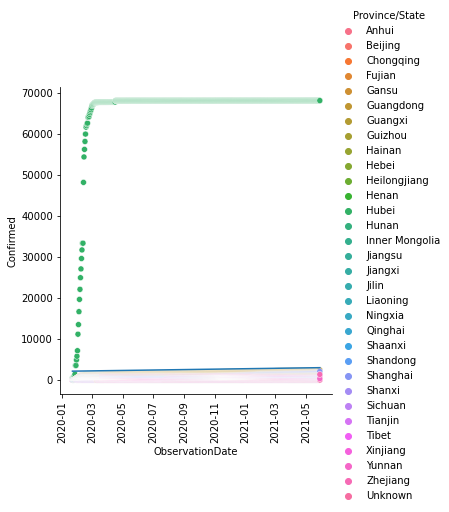

1.9988107666470412e-14
Hong Kong


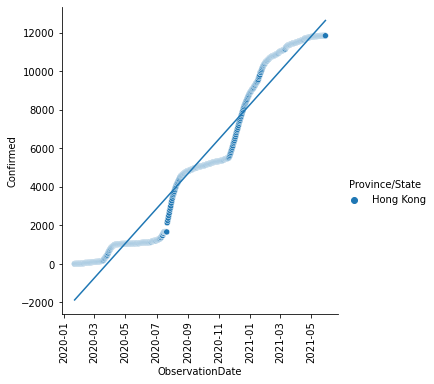

3.4045230179486924e-13
Macau


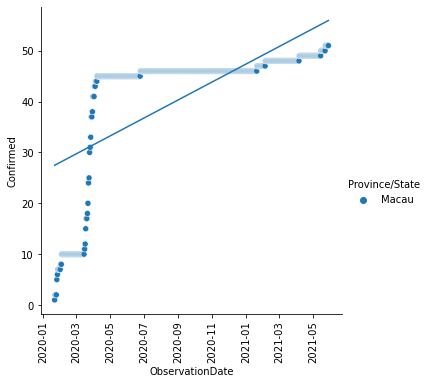

6.681986171150256e-16
Taiwan


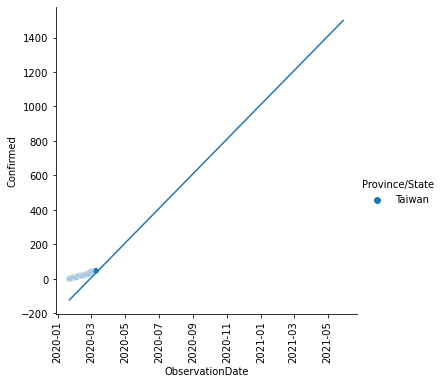

3.80578229253543e-14
US


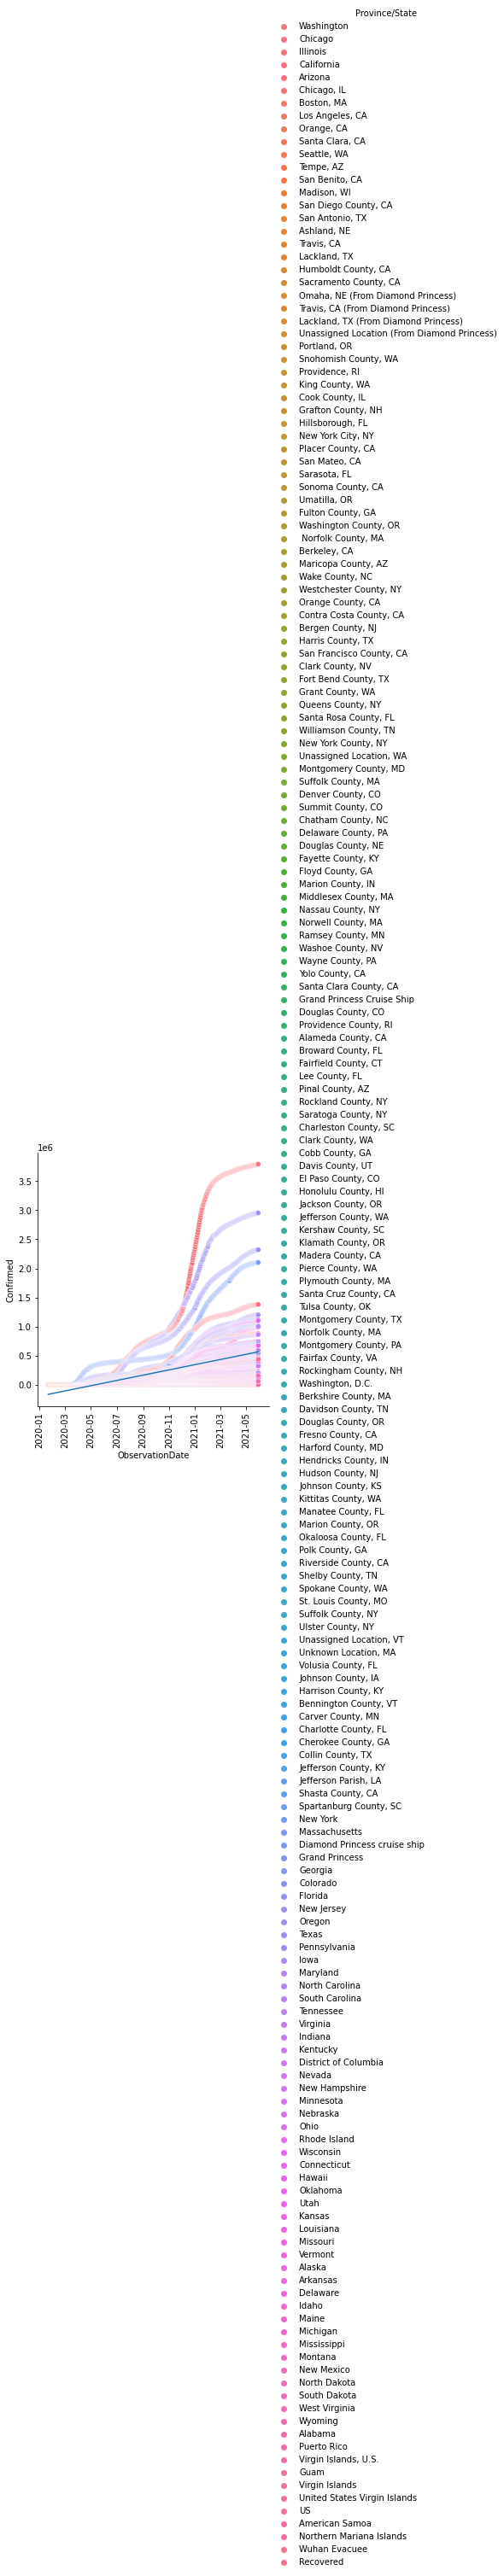

1.7127691717568998e-11
Japan


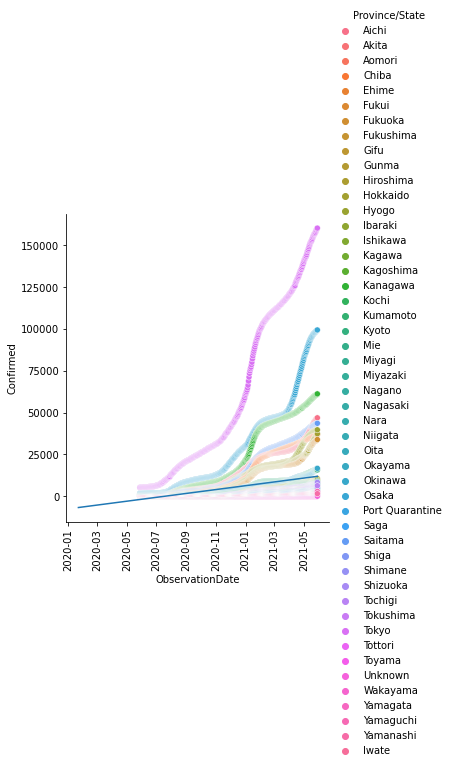

4.3808306298547534e-13
Thailand


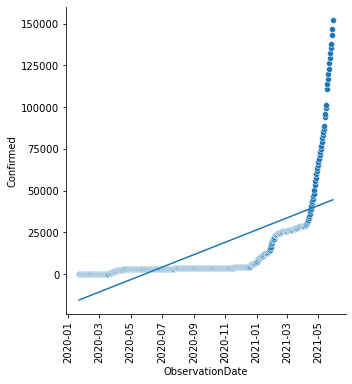

1.4089552982474927e-12
South Korea


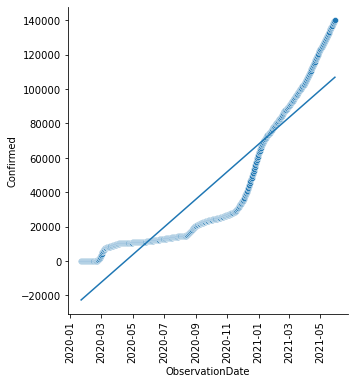

3.0414647256596795e-12
China


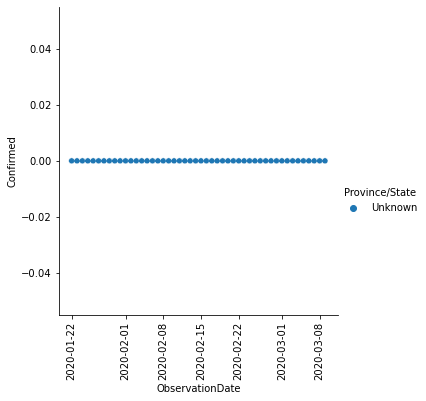

0.0
Kiribati


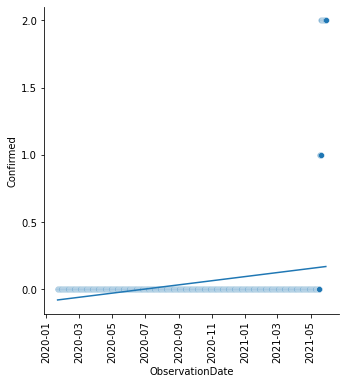

5.846308024166464e-18
Singapore


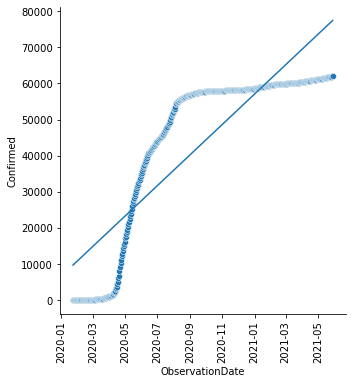

1.5944418773174088e-12
Philippines


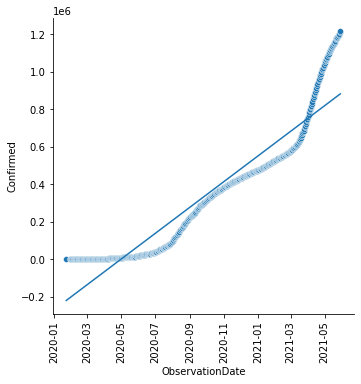

2.5899249962849085e-11
Malaysia


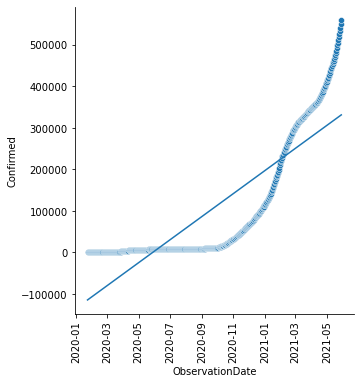

1.0485693610334217e-11
Vietnam


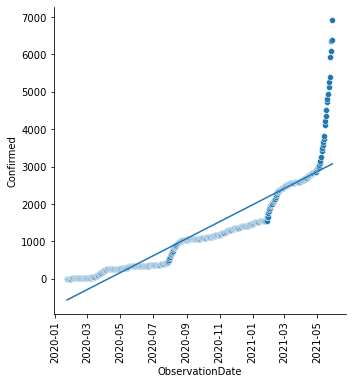

8.56810917395948e-14
Australia


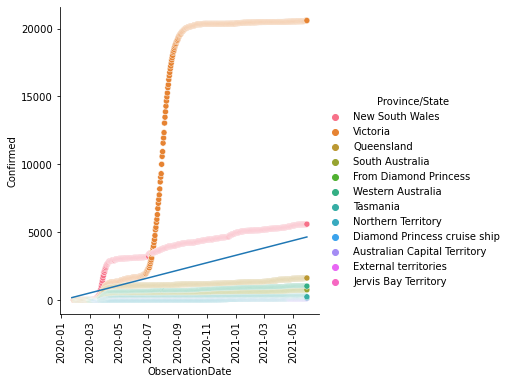

1.051014145693379e-13
Mexico


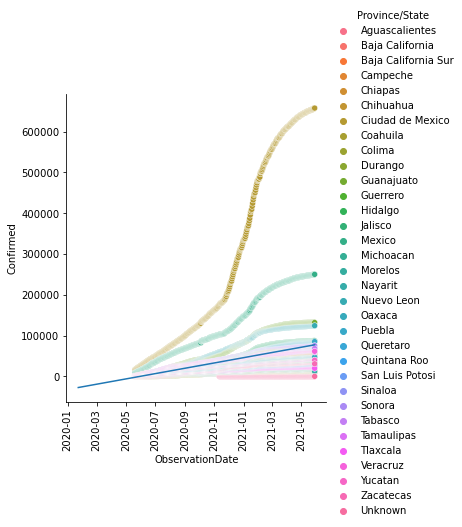

2.4632567132807033e-12
Brazil


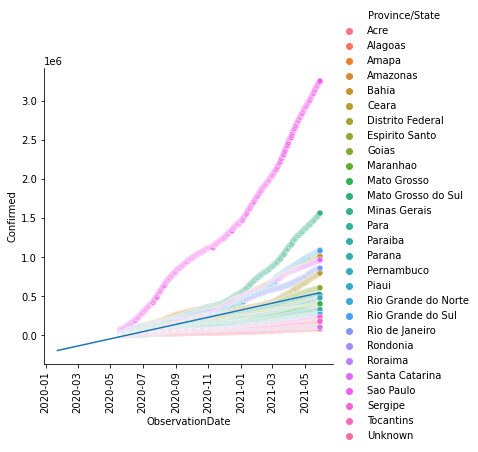

1.743500108706355e-11
Colombia


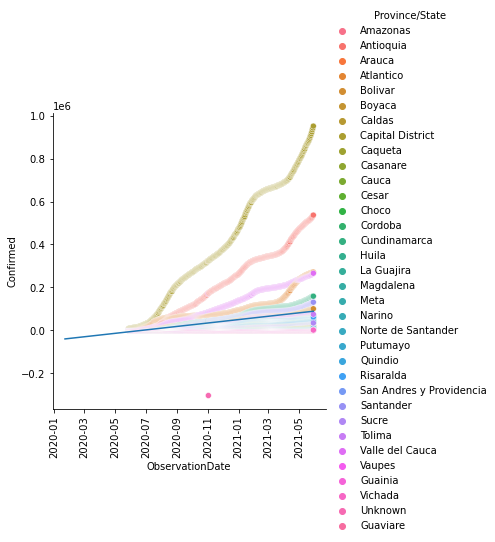

3.0294589078962868e-12
France


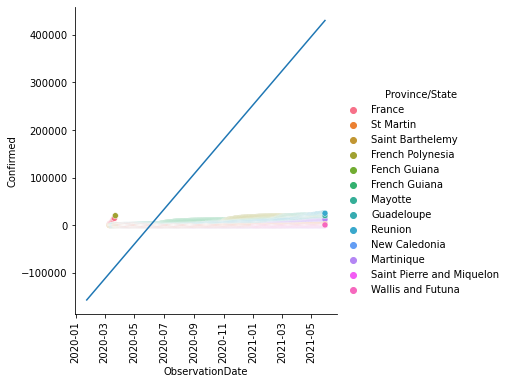

1.3834999911046488e-11
Nepal


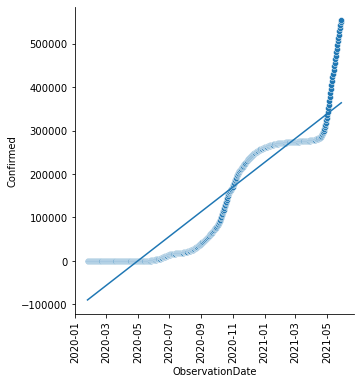

1.0722787778035698e-11
Canada


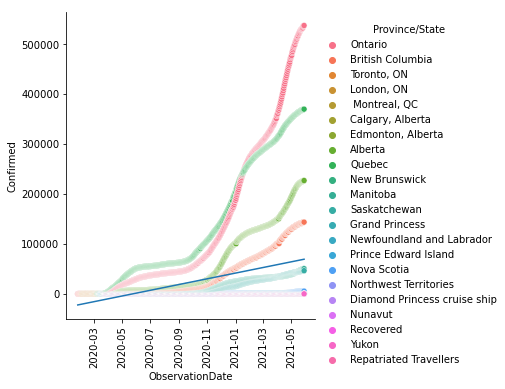

2.1657874051077025e-12
Cambodia


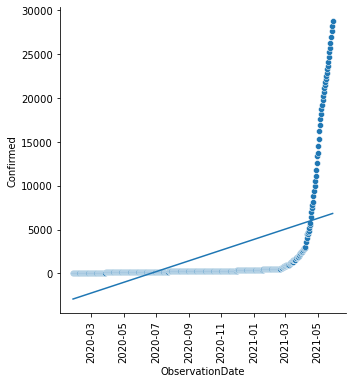

2.314910788926951e-13
Sri Lanka


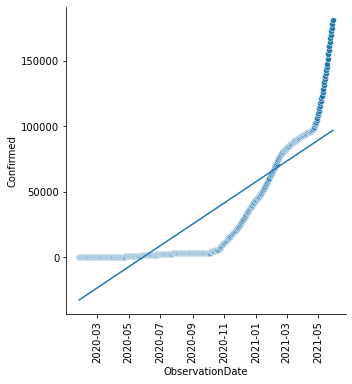

3.0711918277625237e-12
Ivory Coast


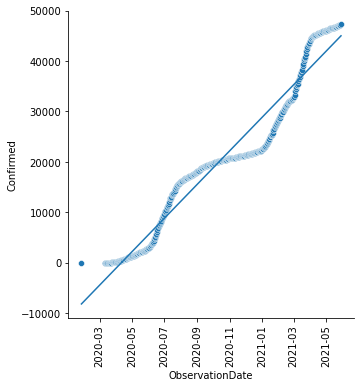

1.2605537695358469e-12
Germany


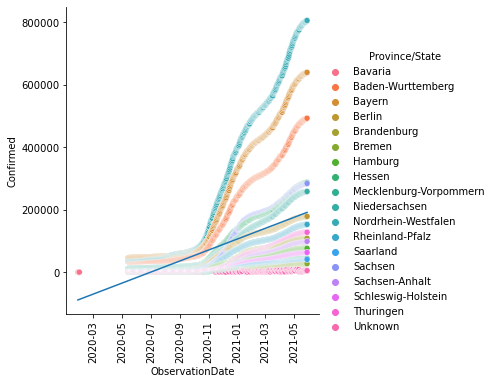

6.656225746397623e-12
Finland


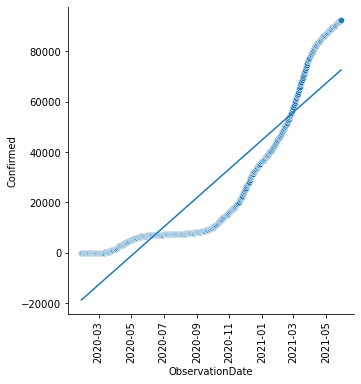

2.175410719128131e-12
United Arab Emirates


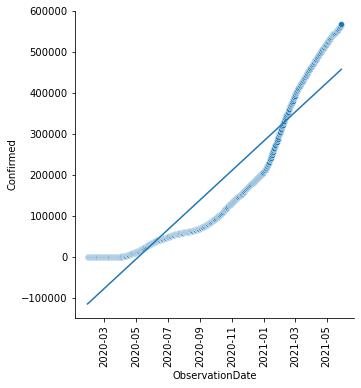

1.361463576033195e-11
India


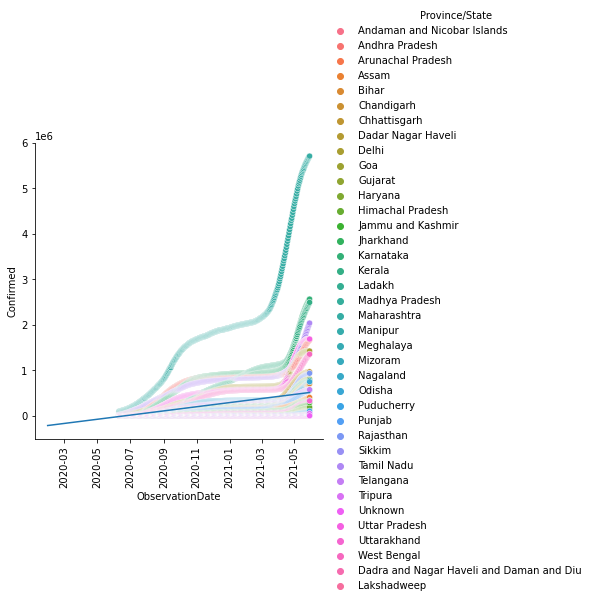

1.734059255324785e-11
Italy


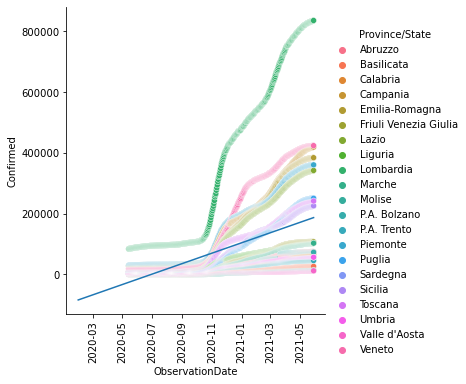

6.473018453060594e-12
UK


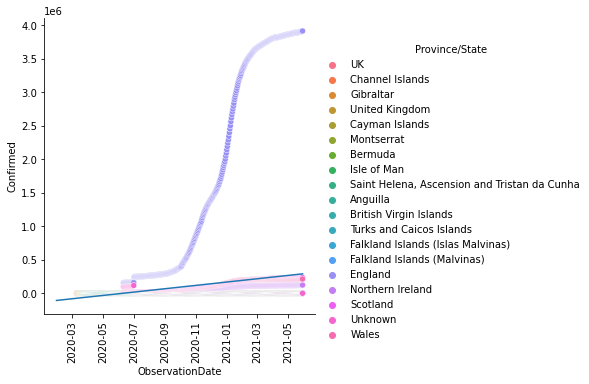

9.484531783293879e-12
Russia


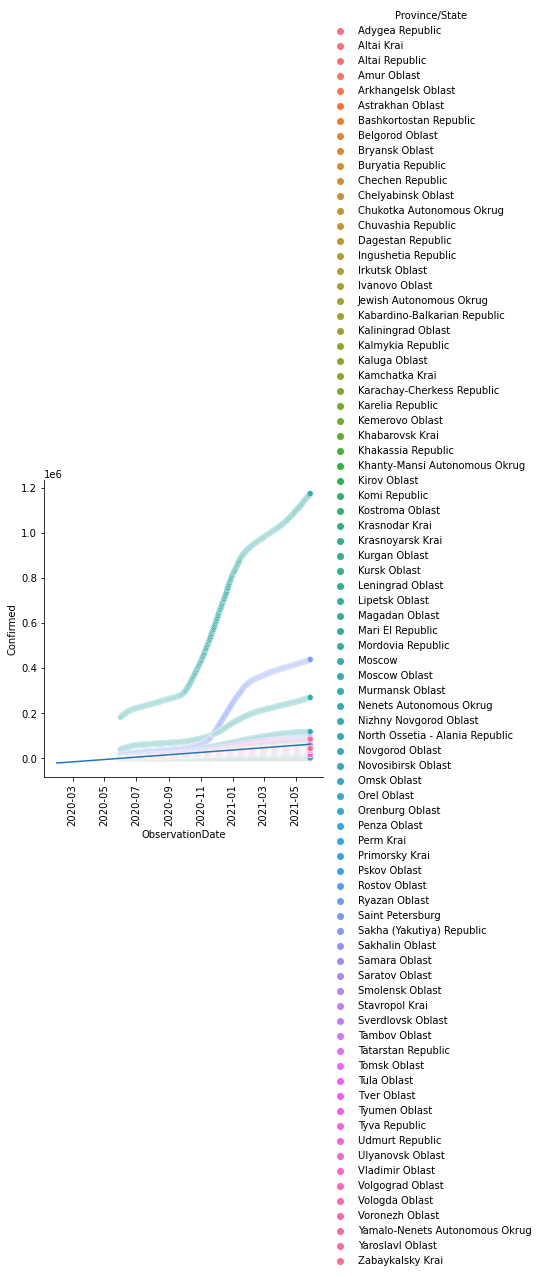

1.9867106564856955e-12
Sweden


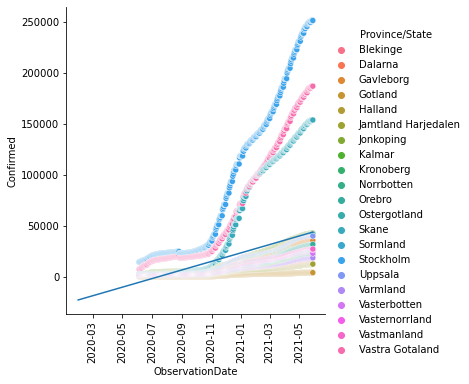

1.5926486417416902e-12
Spain


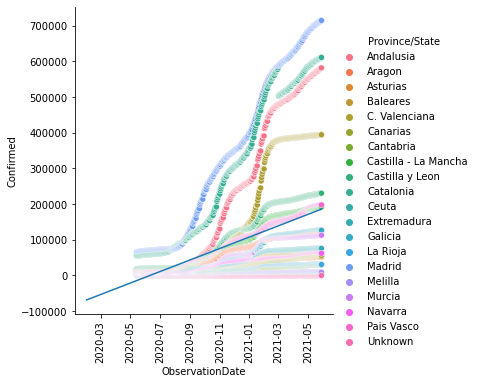

6.098289981725727e-12
Belgium


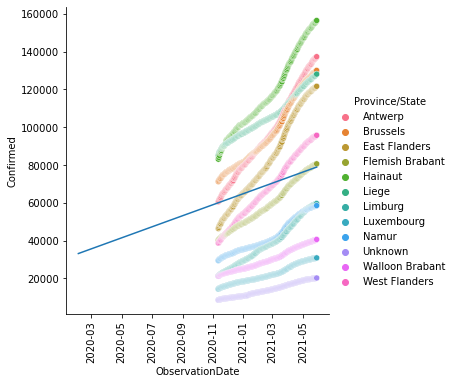

1.1030382636281095e-12
Others


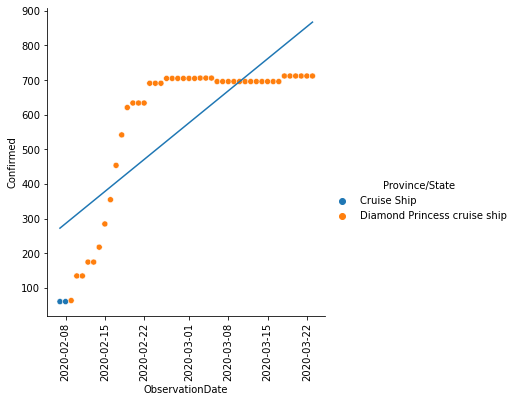

1.5291910782199547e-13
Egypt


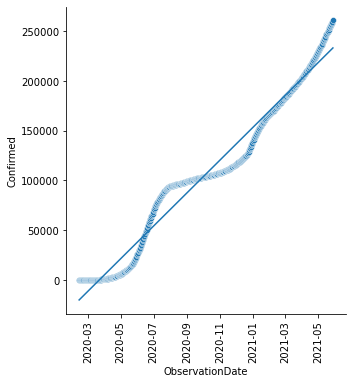

6.234000744284421e-12
Iran


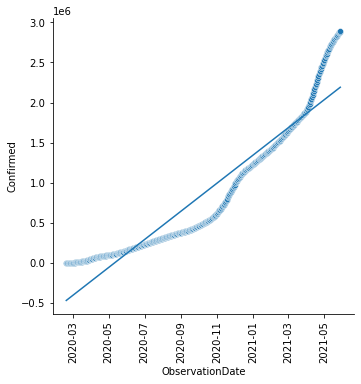

6.624720742614342e-11
Israel


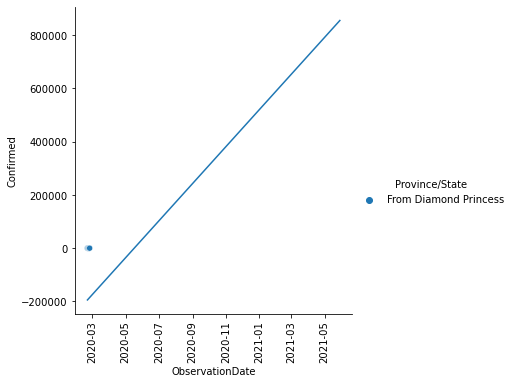

2.623661173290807e-11
Lebanon


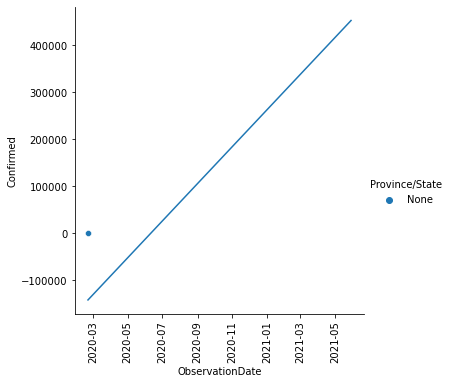

1.484437717799607e-11
Iraq


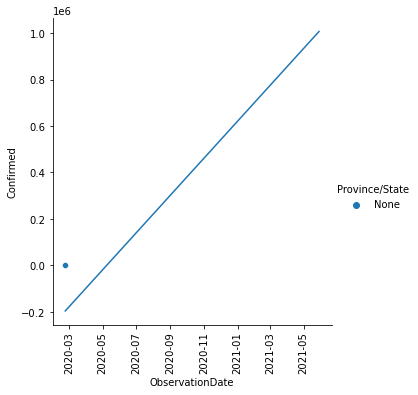

3.020464574978698e-11
Oman


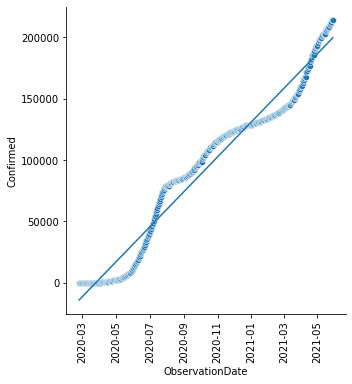

5.377802346375555e-12
Afghanistan


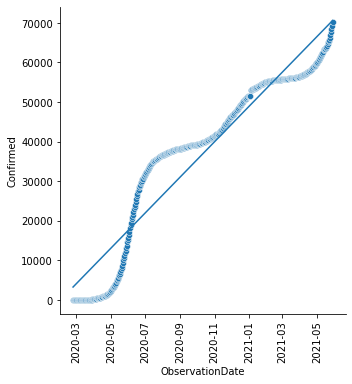

1.6942787602948759e-12
Bahrain


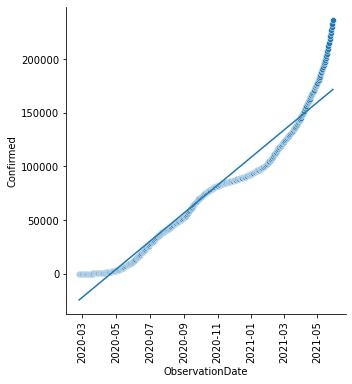

4.928446712876875e-12
Kuwait


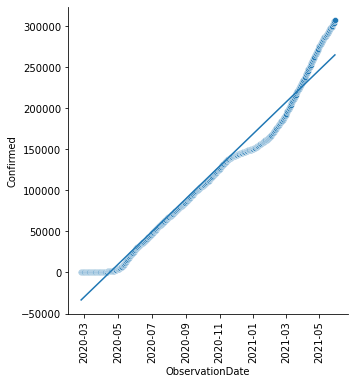

7.504618564928806e-12
Austria


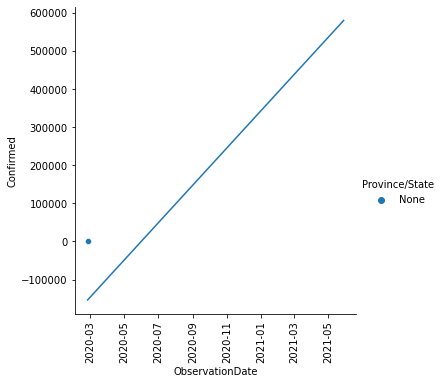

1.846817719335147e-11
Algeria


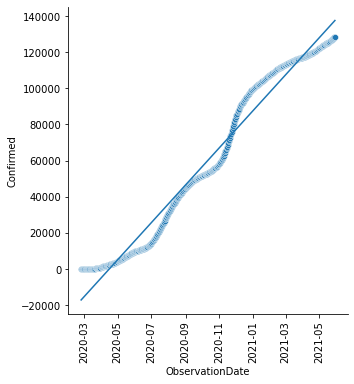

3.903870915095454e-12
Croatia


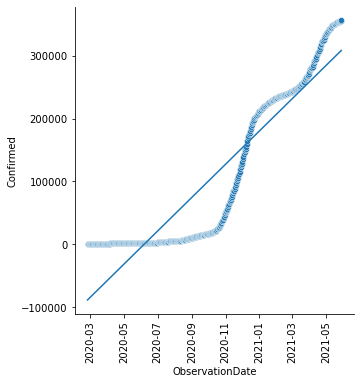

1.0007855862137611e-11
Switzerland


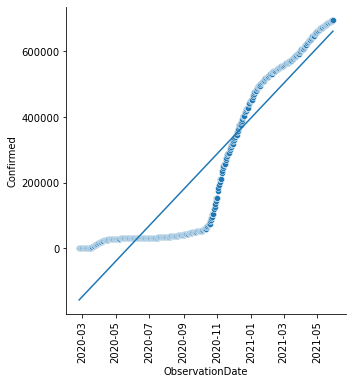

2.0603175501922913e-11
Pakistan


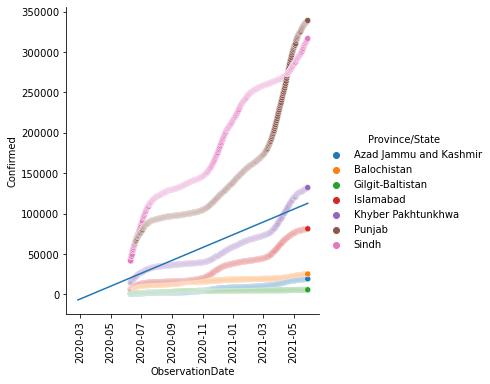

3.024420750260149e-12
Georgia


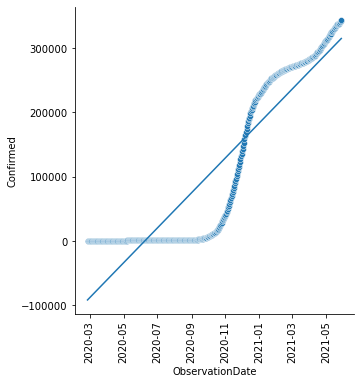

1.0279155233790784e-11
Greece


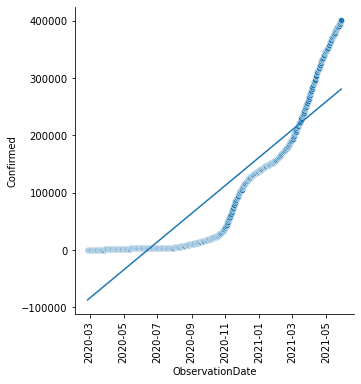

9.295452676103553e-12
North Macedonia


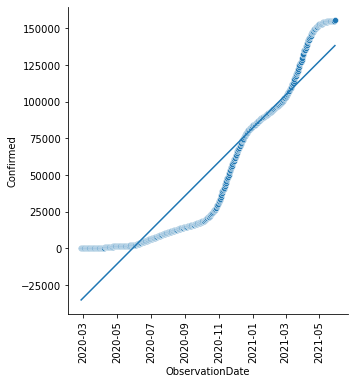

4.378298179731956e-12
Norway


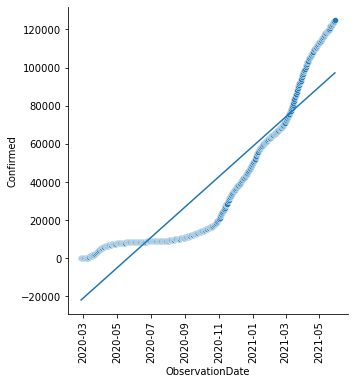

3.009420432906049e-12
Romania


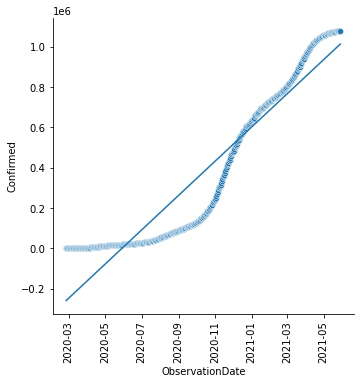

3.211705152436728e-11
Denmark


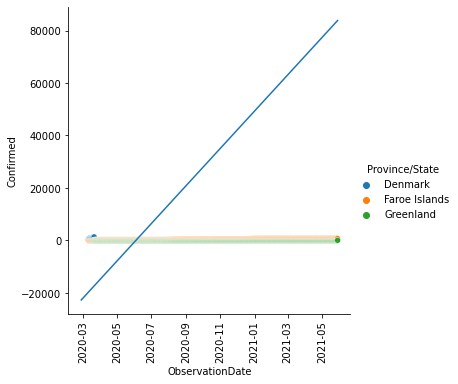

2.698436446234324e-12
Estonia


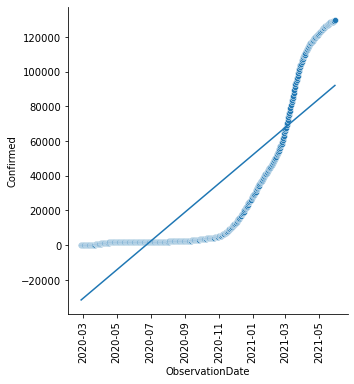

3.130240300967376e-12
Netherlands


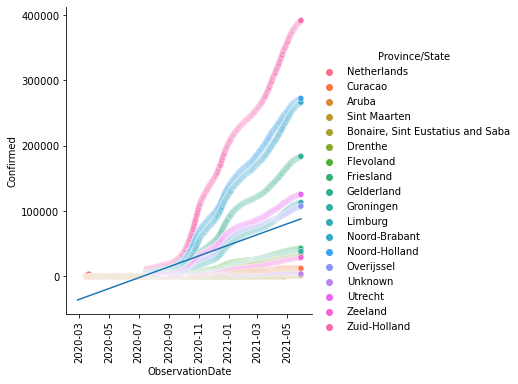

3.1431310386085924e-12
San Marino


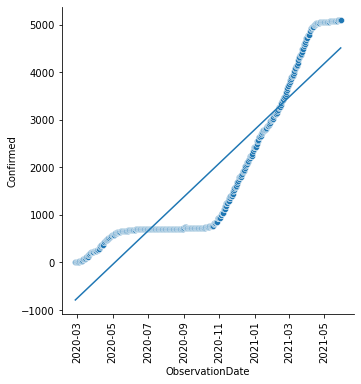

1.34319940077564e-13
 Azerbaijan


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


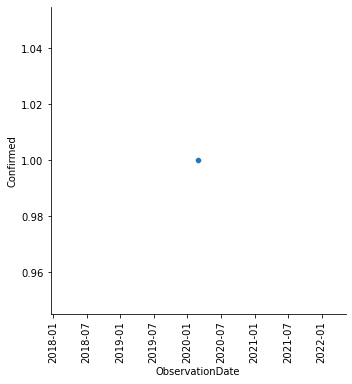

3.1588630114830975e-19
Belarus


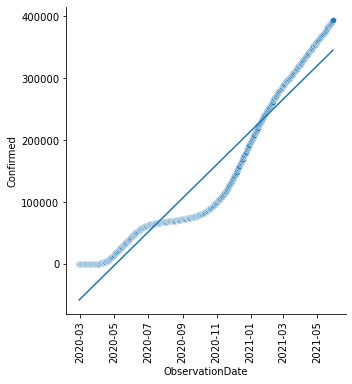

1.0227979245003902e-11
Iceland


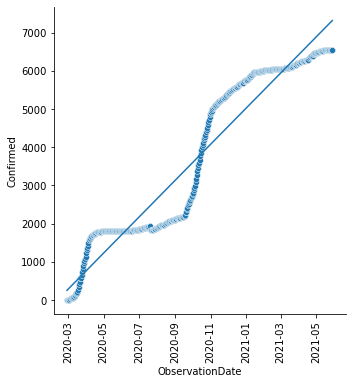

1.792889692859294e-13
Lithuania


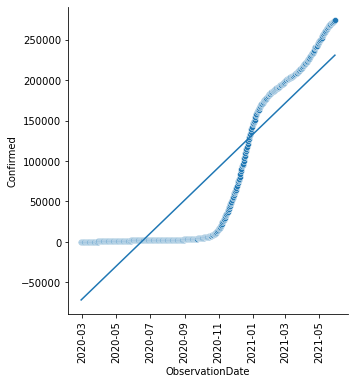

7.687389462568431e-12
New Zealand


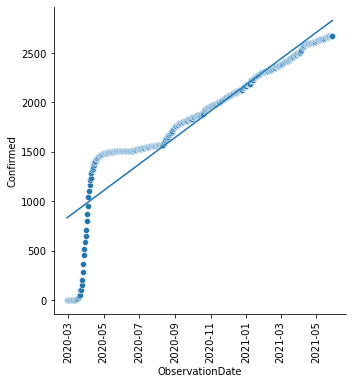

5.067526841792152e-14
Nigeria


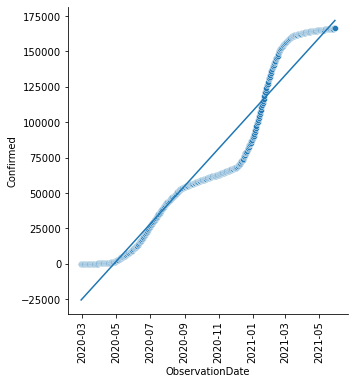

5.011823847988128e-12
North Ireland


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


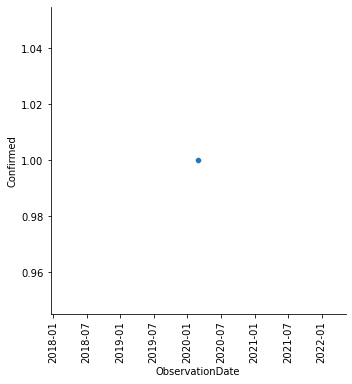

3.1588630114830975e-19
Ireland


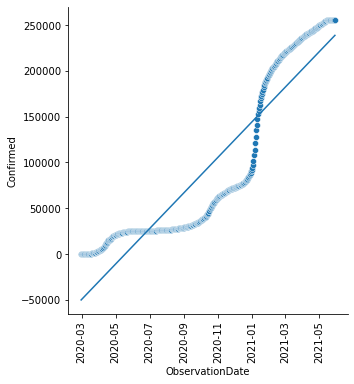

7.346399145575653e-12
Luxembourg


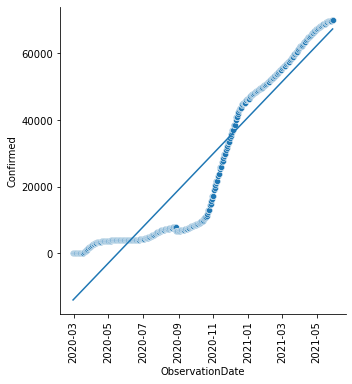

2.067429901849517e-12
Monaco


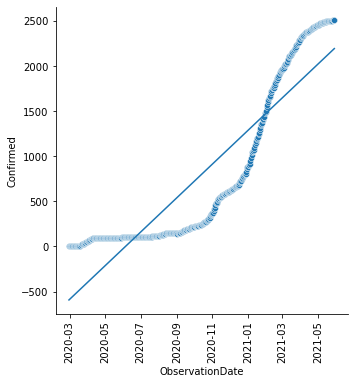

7.084919172475273e-14
Qatar


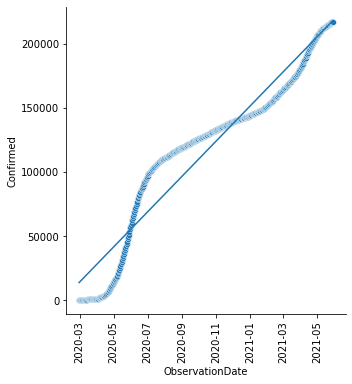

5.198627633491358e-12
Ecuador


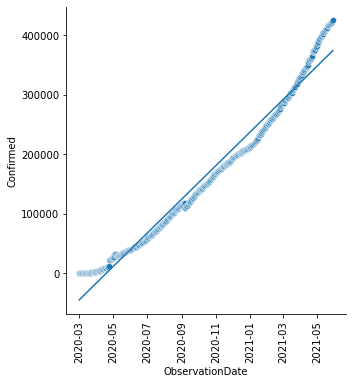

1.0691390982987603e-11
Azerbaijan


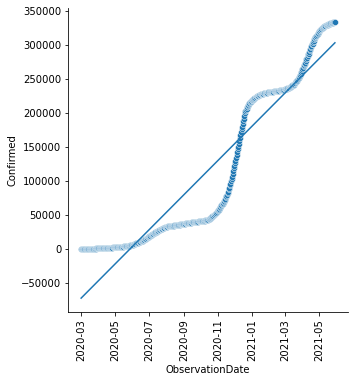

9.584240401105832e-12
Czech Republic


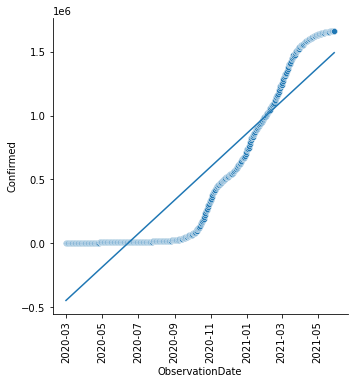

4.937646134248698e-11
Armenia


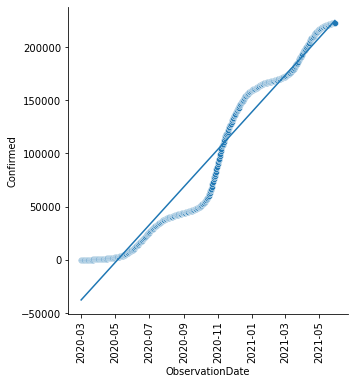

6.692355754073234e-12
Dominican Republic


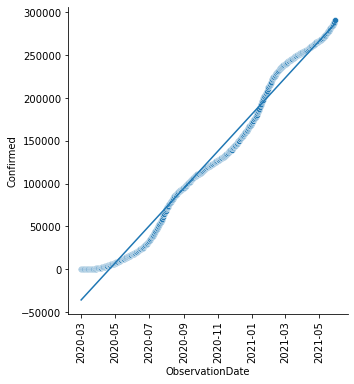

8.227765155150383e-12
Indonesia


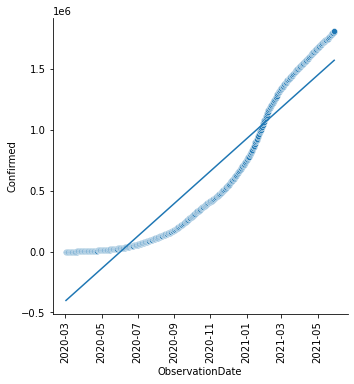

5.0356057315920865e-11
Portugal


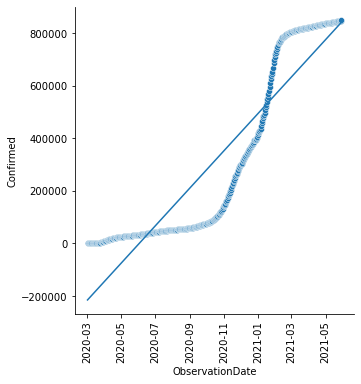

2.698379666512805e-11
Andorra


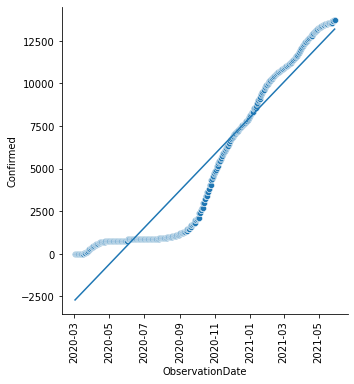

4.0605630426793144e-13
Latvia


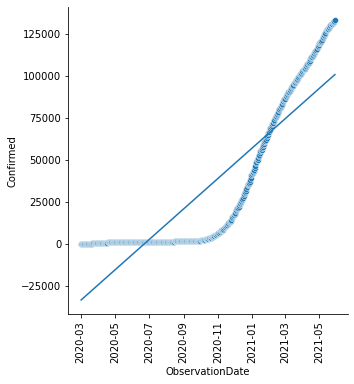

3.429556528784859e-12
Morocco


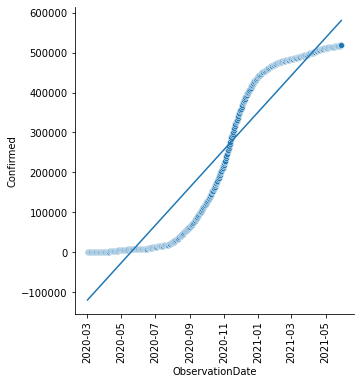

1.7897813921906168e-11
Saudi Arabia


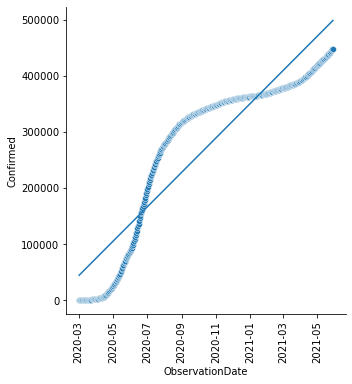

1.1606635199029493e-11
Senegal


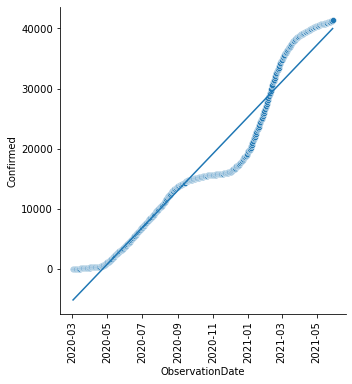

1.1549660305695652e-12
Argentina


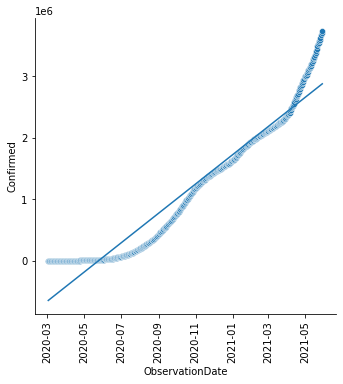

9.012308809302351e-11
Chile


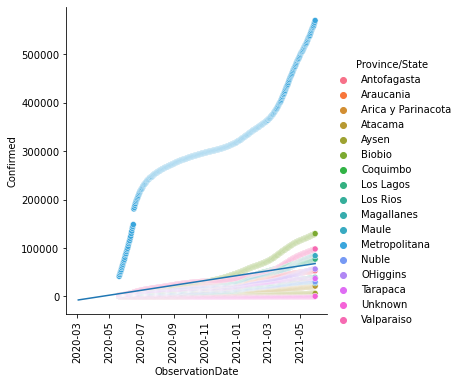

1.924624038201803e-12
Jordan


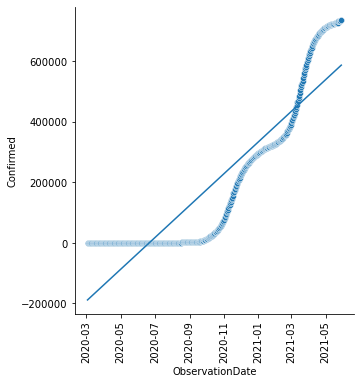

1.9858399206719815e-11
Ukraine


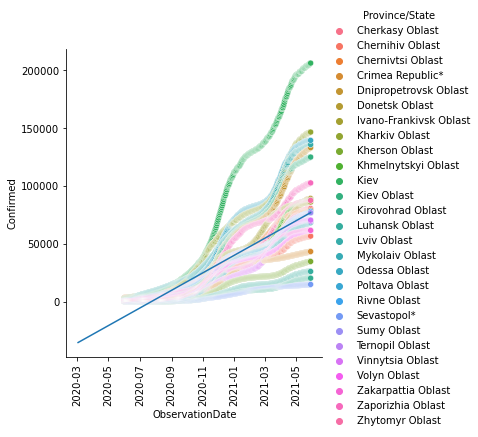

2.8768017365018283e-12
Saint Barthelemy


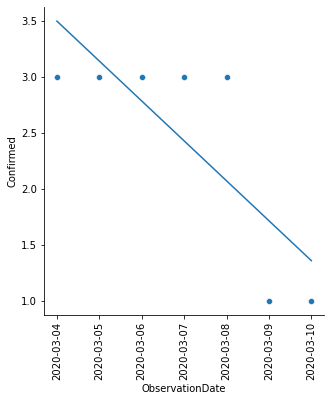

-4.133597883598621e-15
Hungary


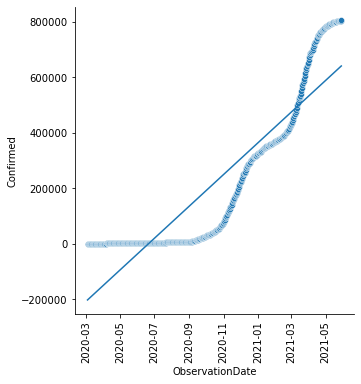

2.1629193112826418e-11
Faroe Islands


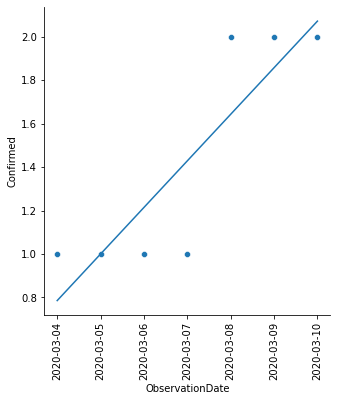

2.4801587301580115e-15
Gibraltar


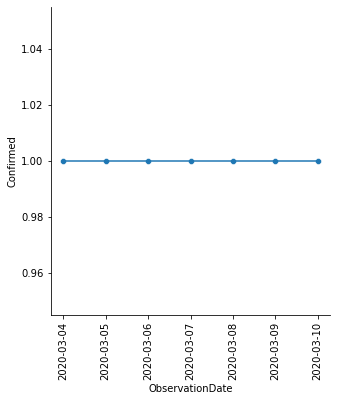

-8.220574737022007e-31
Liechtenstein


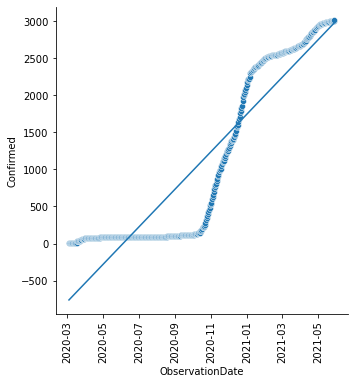

9.591388781429557e-14
Poland


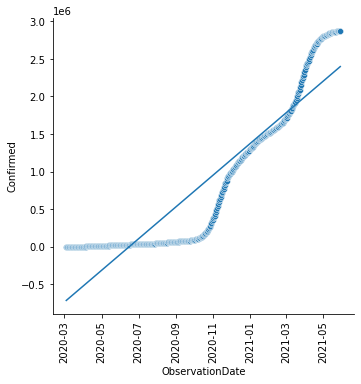

7.985166295625582e-11
Tunisia


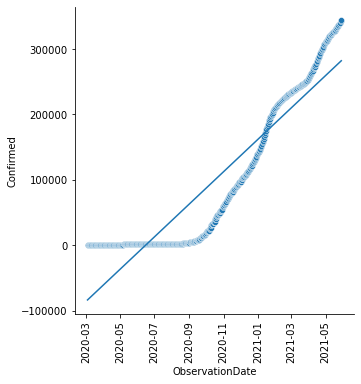

9.382044417118945e-12
Palestine


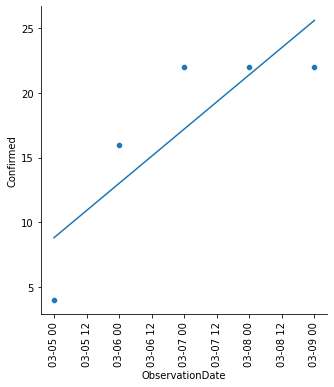

4.861111111116462e-14
Bosnia and Herzegovina


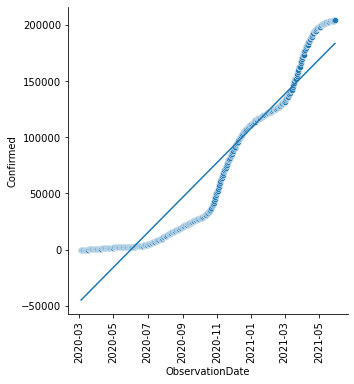

5.8722611877947155e-12
Slovenia


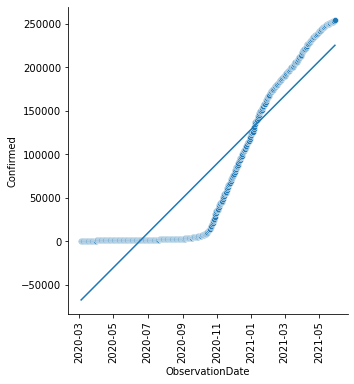

7.522194616561614e-12
South Africa


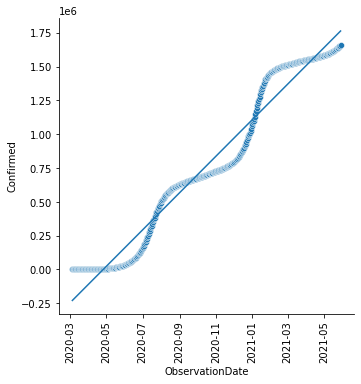

5.1235837749512557e-11
Bhutan


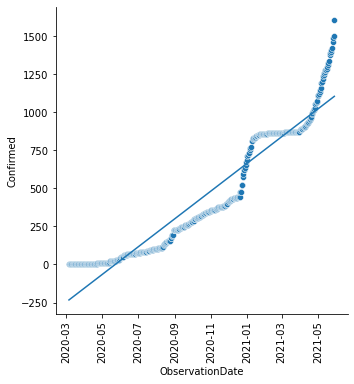

3.448697719525399e-14
Cameroon


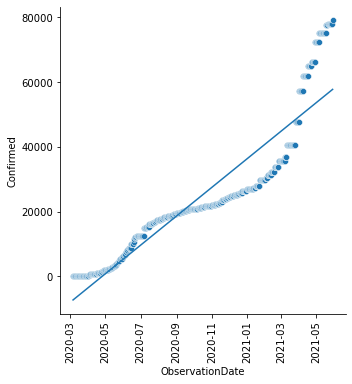

1.674030192589278e-12
Costa Rica


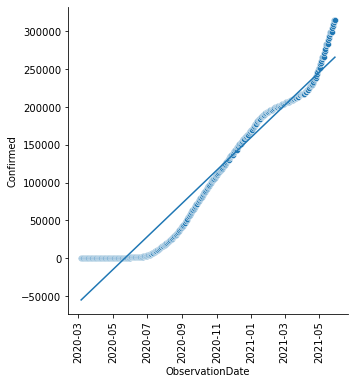

8.266099963670003e-12
Peru


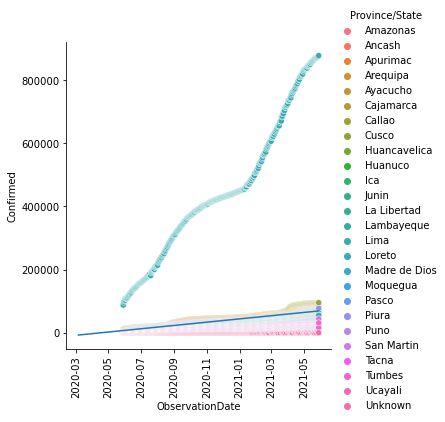

1.9683714695981383e-12
Serbia


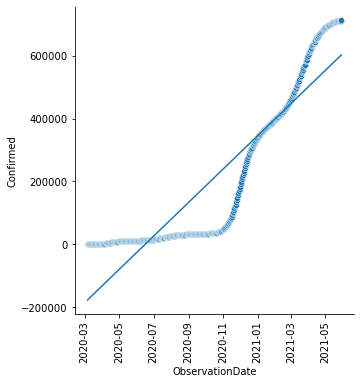

2.009397336377643e-11
Slovakia


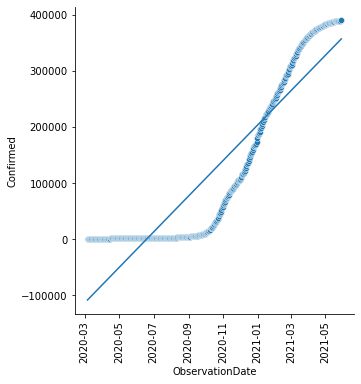

1.1991718646042408e-11
Togo


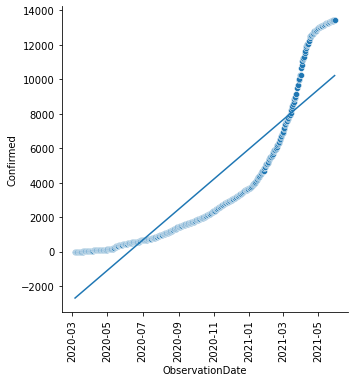

3.32929412728696e-13
Vatican City


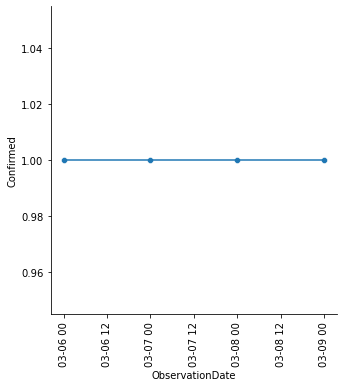

7.010832038545031e-35
French Guiana


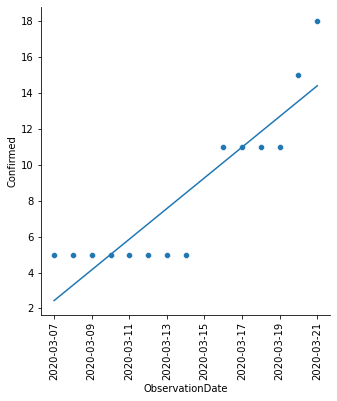

9.890572390569837e-15
Malta


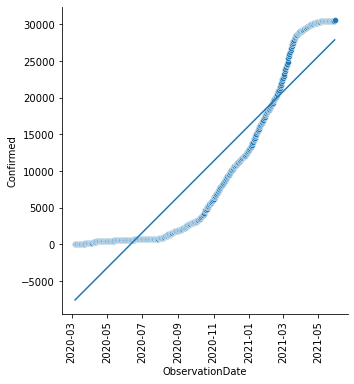

9.16478282622957e-13
Martinique


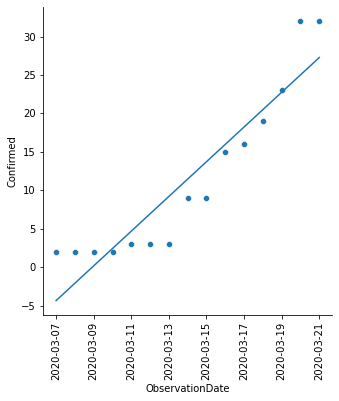

2.6124338624332848e-14
Republic of Ireland


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


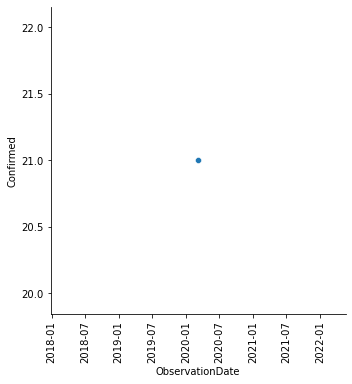

6.630355053618732e-18
Bulgaria


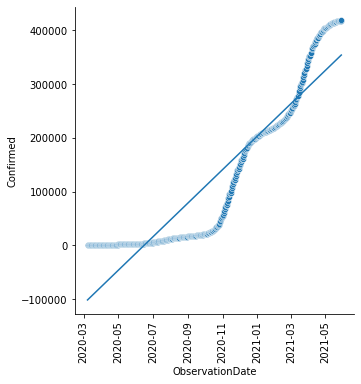

1.1796659808975897e-11
Maldives


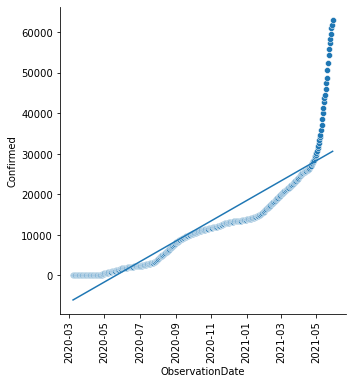

9.498070685002105e-13
Bangladesh


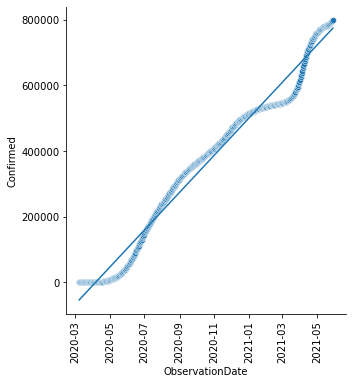

2.142672598465835e-11
Moldova


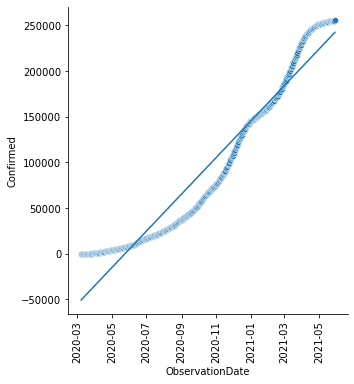

7.580329391167032e-12
Paraguay


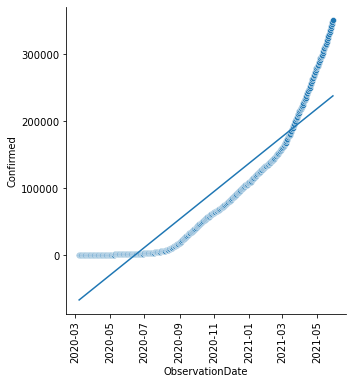

7.901638546653165e-12
Albania


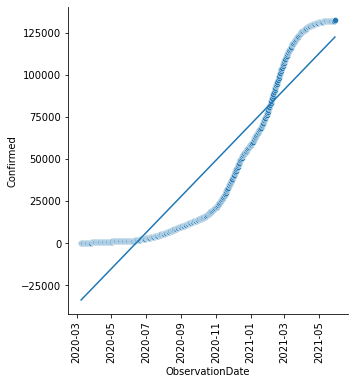

4.059606414613907e-12
Cyprus


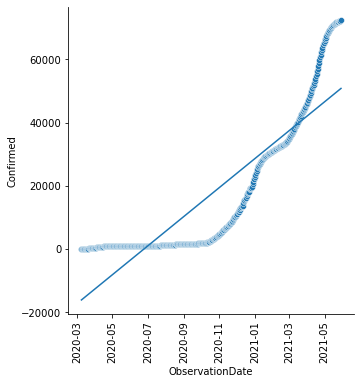

1.740088064706174e-12
St. Martin


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


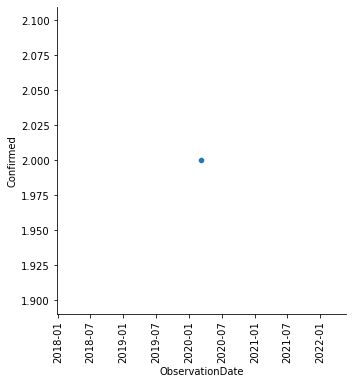

6.314279363924751e-19
Brunei


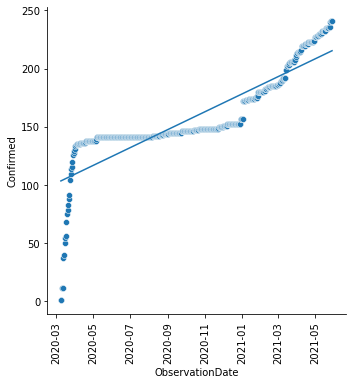

2.9052110135100803e-15
occupied Palestinian territory


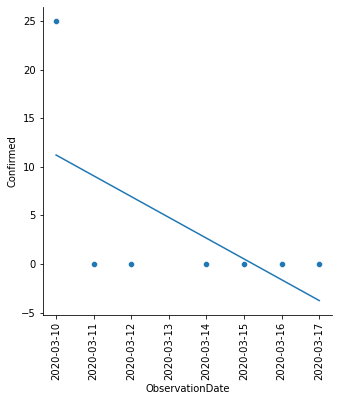

-2.4773274987292825e-14
('St. Martin',)


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


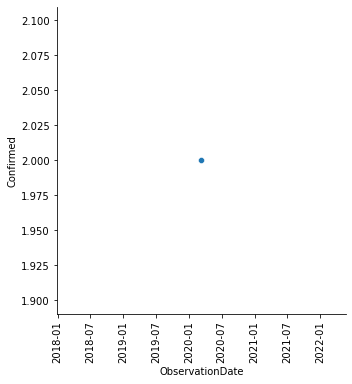

6.3139349048464725e-19
Burkina Faso


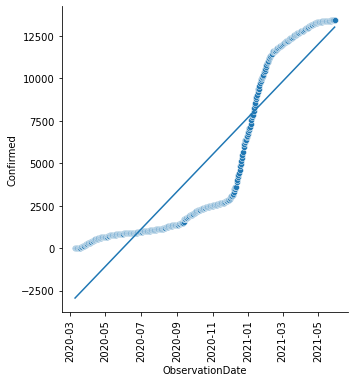

4.1520015641406633e-13
Channel Islands


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


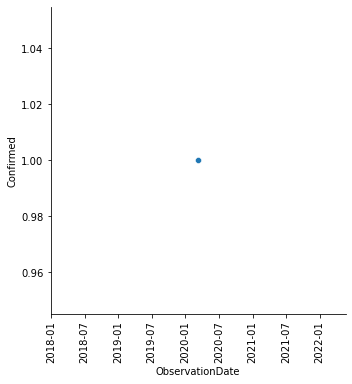

3.1569674524232363e-19
Holy See


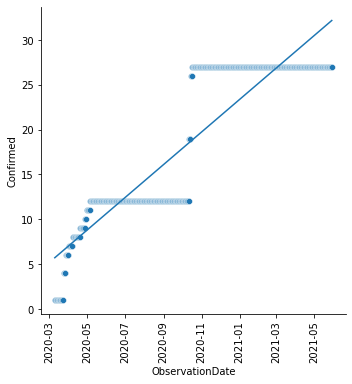

6.882332292948331e-16
Mongolia


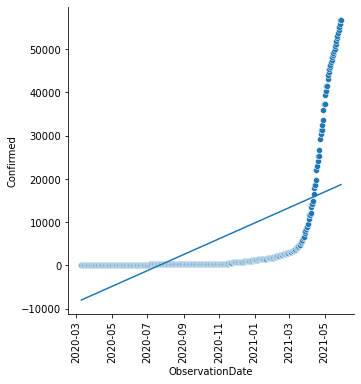

6.93352224307149e-13
Panama


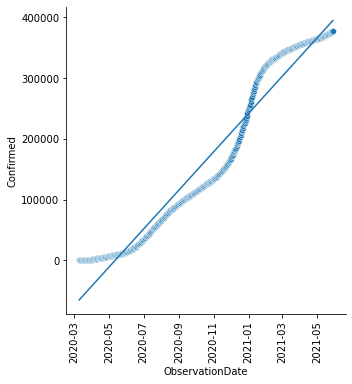

1.1968625763564025e-11
Bolivia


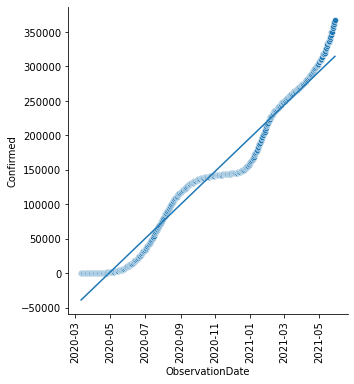

9.218081863228149e-12
Honduras


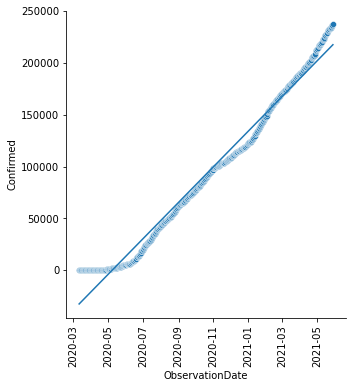

6.517425911766035e-12
Congo (Kinshasa)


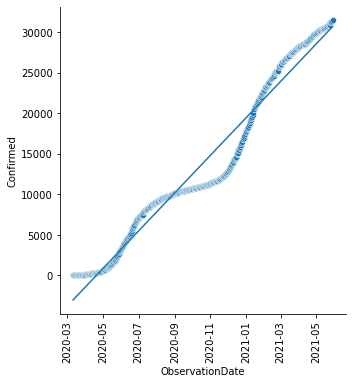

8.781643789201586e-13
Jamaica


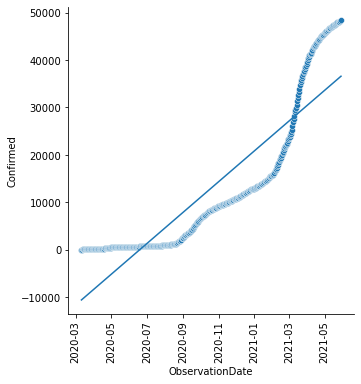

1.231806915874404e-12
Reunion


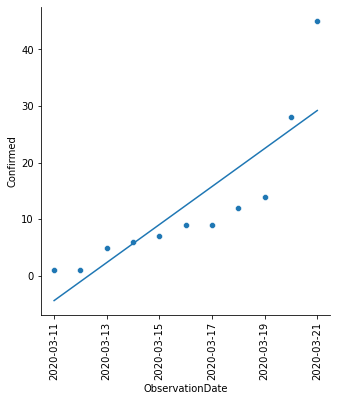

3.882575757574382e-14
Turkey


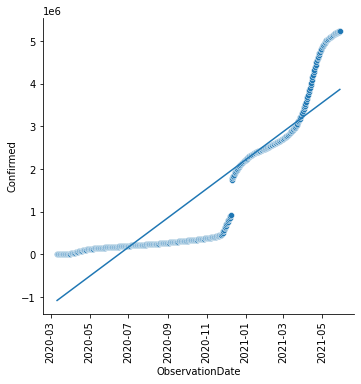

1.2901872050635527e-10
Cuba


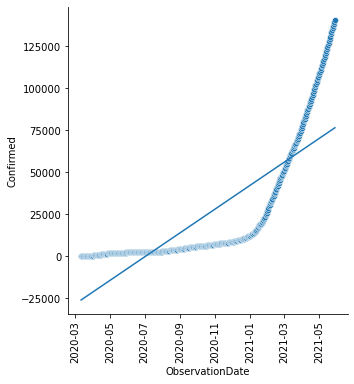

2.6772743215543978e-12
Guyana


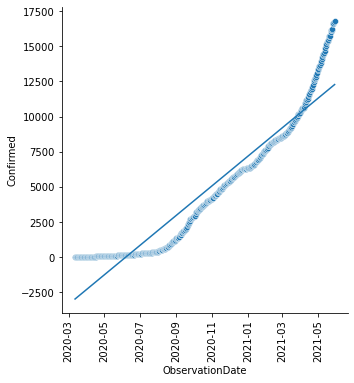

3.9827567092036645e-13
Kazakhstan


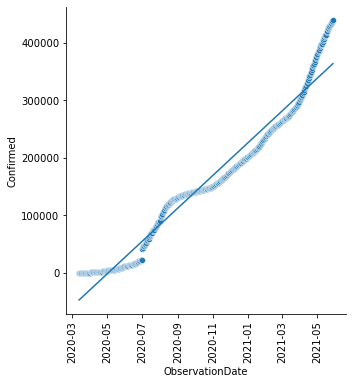

1.0762415563321815e-11
Cayman Islands


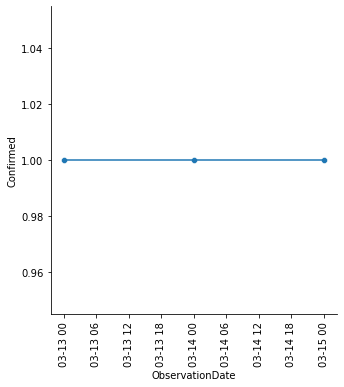

-1.1179846228645692e-31
Guadeloupe


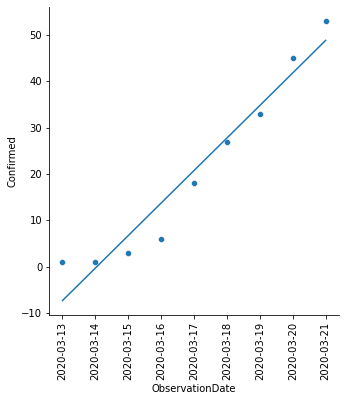

8.121141975309781e-14
Ethiopia


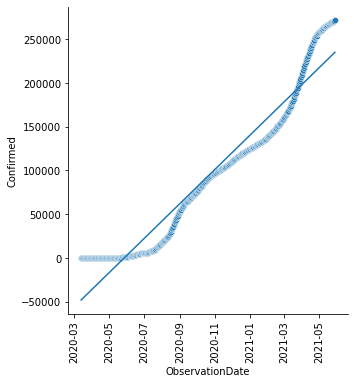

7.407251208684453e-12
Sudan


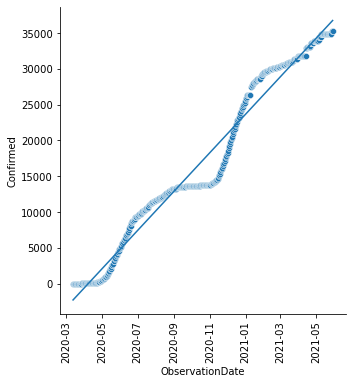

1.0224387337528023e-12
Guinea


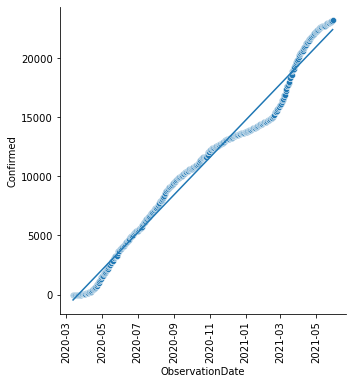

5.98575116629658e-13
Antigua and Barbuda


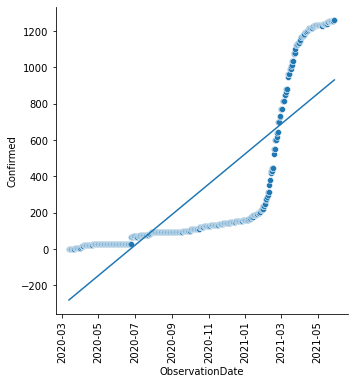

3.1768268618454513e-14
Aruba


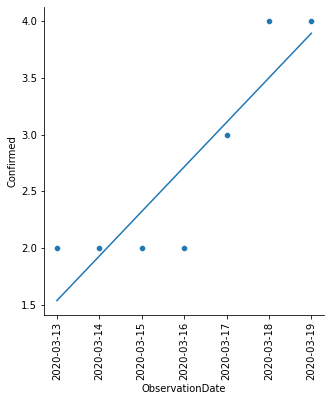

4.546957671954548e-15
Kenya


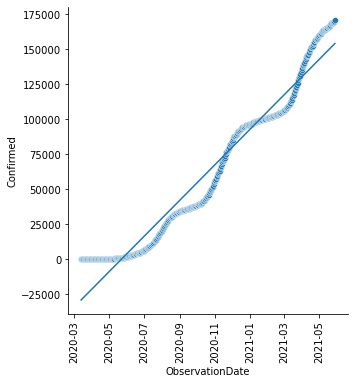

4.791601631392995e-12
Uruguay


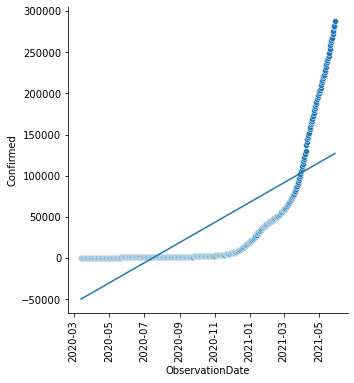

4.6391275434820075e-12
Ghana


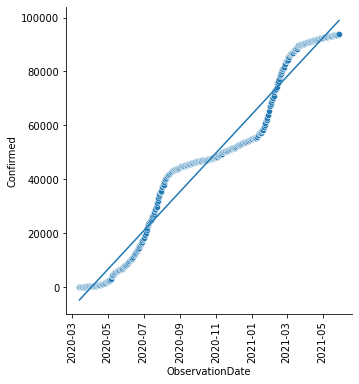

2.724000158738161e-12
Jersey


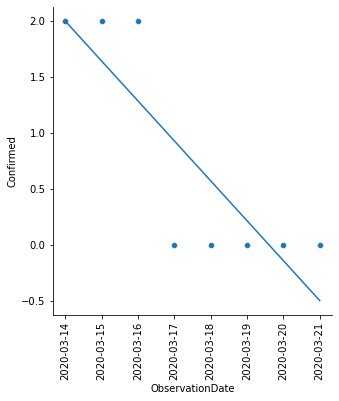

-4.133597883590807e-15
Namibia


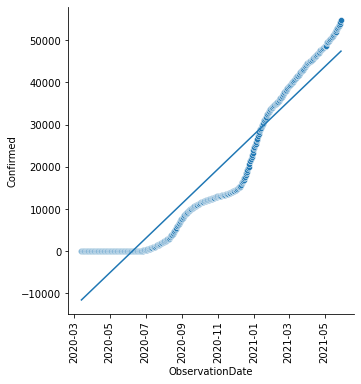

1.5482056446664638e-12
Seychelles


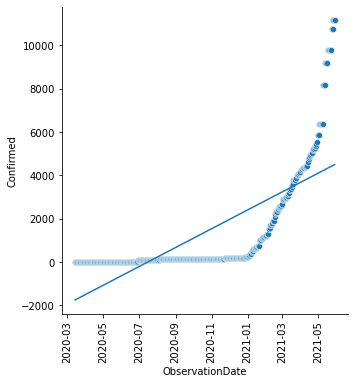

1.6393132532929306e-13
Trinidad and Tobago


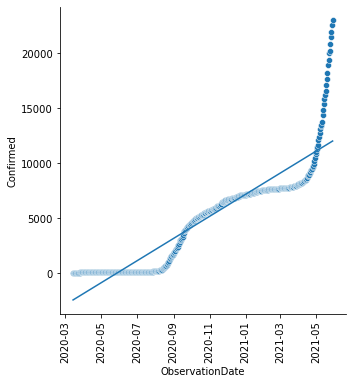

3.797333158019307e-13
Venezuela


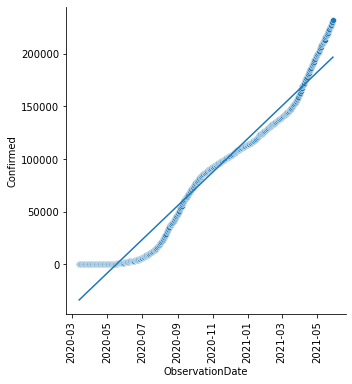

6.0507797171333925e-12
Curacao


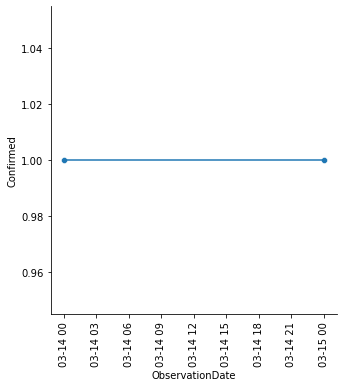

1.354788048786019e-30
Eswatini


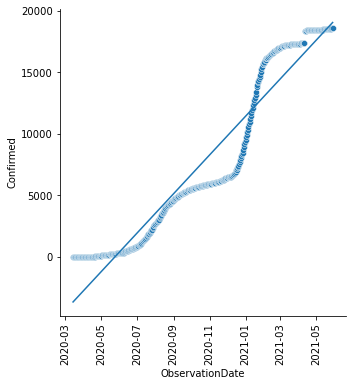

5.966274417904504e-13
Gabon


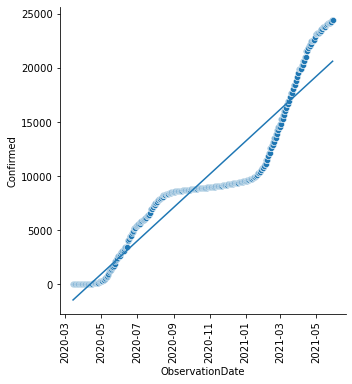

5.78339864143068e-13
Guatemala


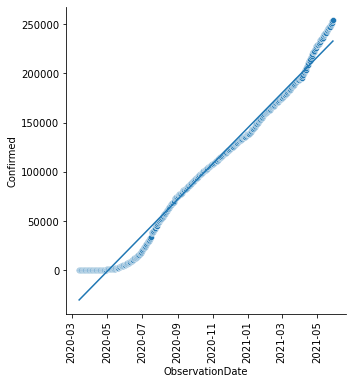

6.909235702667296e-12
Guernsey


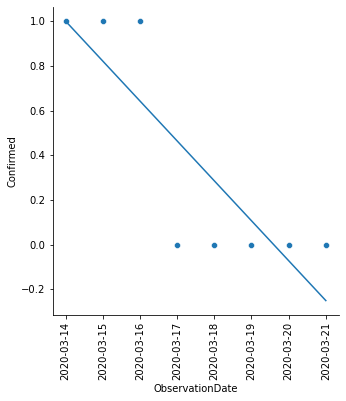

-2.0667989417954034e-15
Mauritania


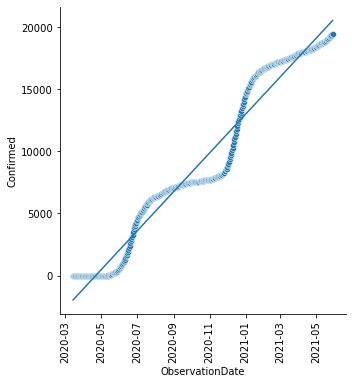

5.902446344116805e-13
Rwanda


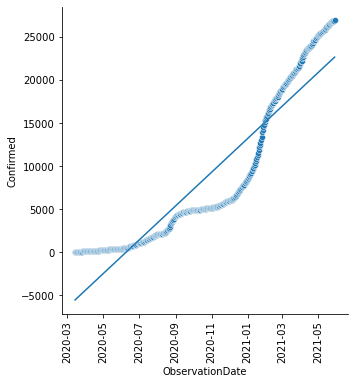

7.405102378458537e-13
Saint Lucia


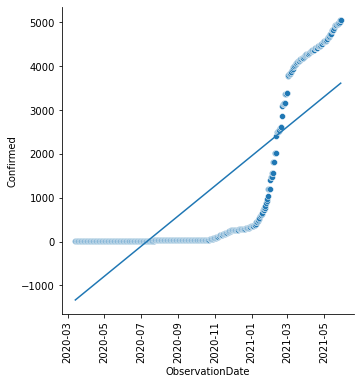

1.296026415749813e-13
Saint Vincent and the Grenadines


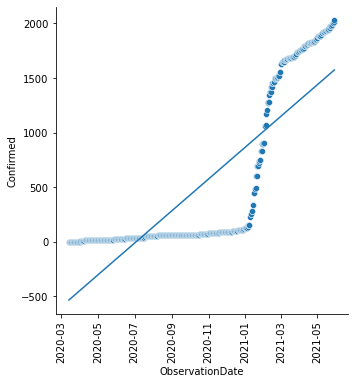

5.5329348945497436e-14
Suriname


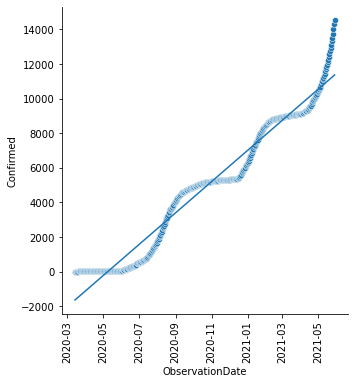

3.4142879689224645e-13
Kosovo


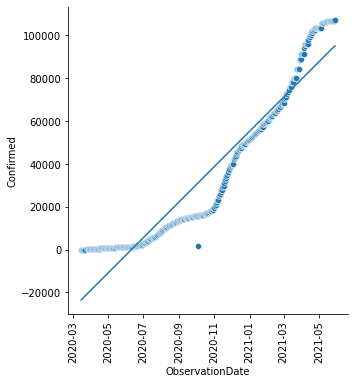

3.121969342913295e-12
Central African Republic


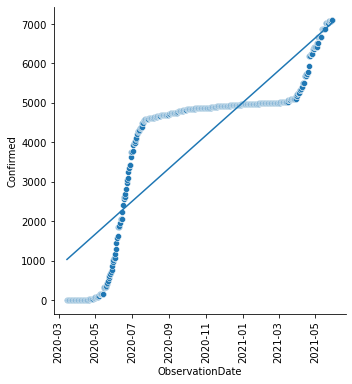

1.5785630167632956e-13
Congo (Brazzaville)


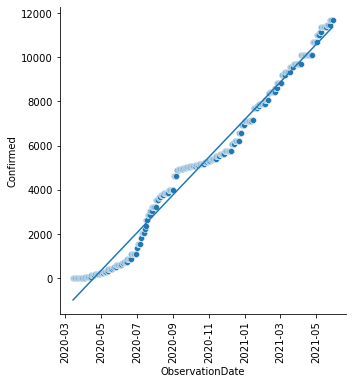

3.2488108232155825e-13
Equatorial Guinea


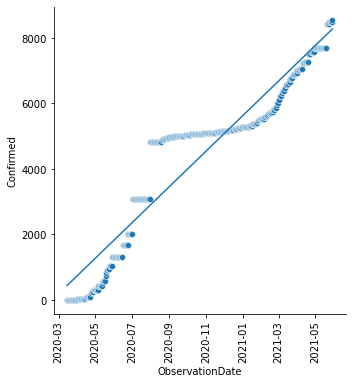

2.0598462934772442e-13
Uzbekistan


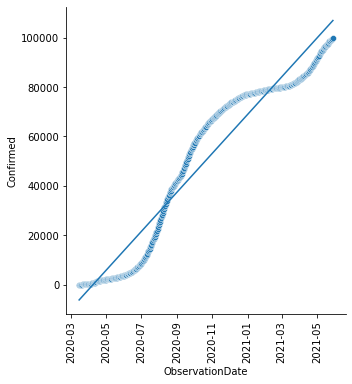

2.976519219122508e-12
Guam


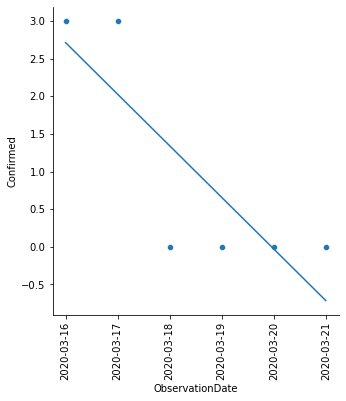

-7.93650793649296e-15
Puerto Rico


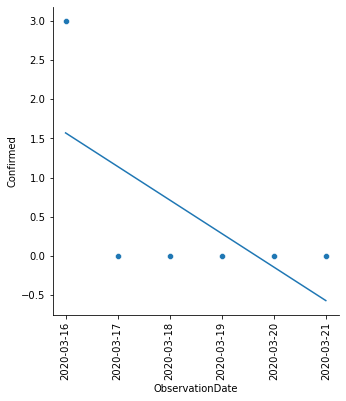

-4.960317460315225e-15
Benin


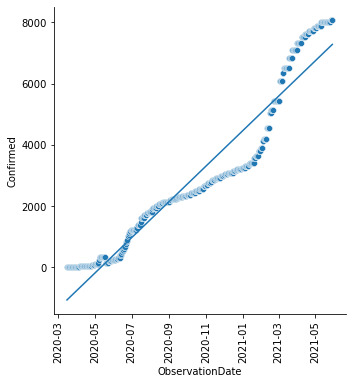

2.200659669541866e-13
Greenland


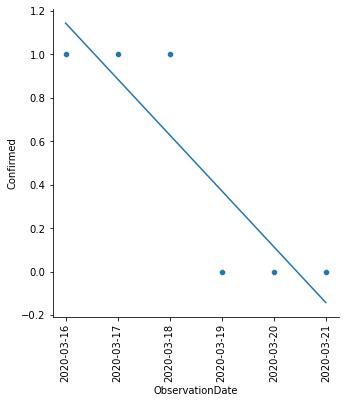

-2.9761904761816228e-15
Liberia


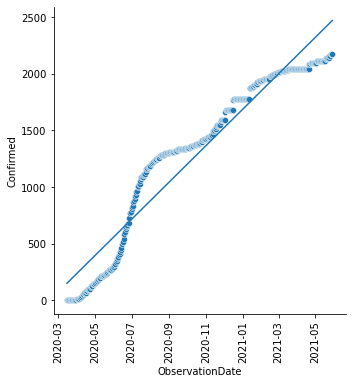

6.12443619141742e-14
Mayotte


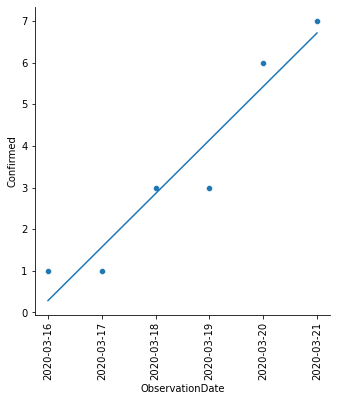

1.4880952380909766e-14
Republic of the Congo


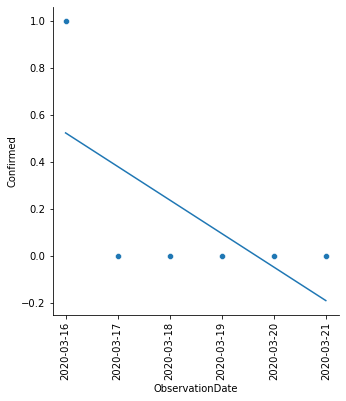

-1.6534391534384085e-15
Somalia


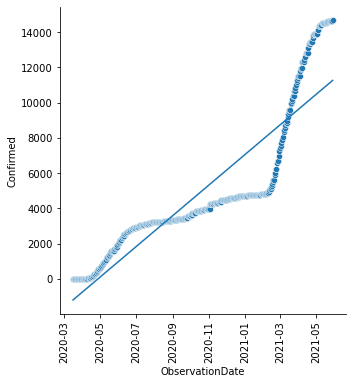

3.2835870364344124e-13
Tanzania


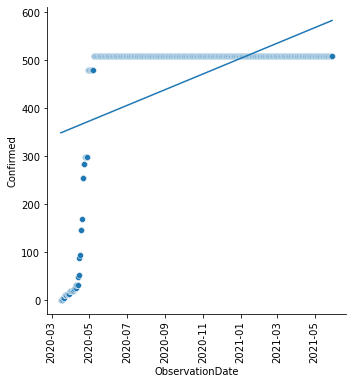

6.1672070617590904e-15
The Bahamas


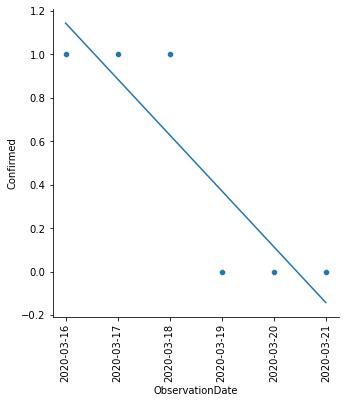

-2.9761904761816228e-15
Barbados


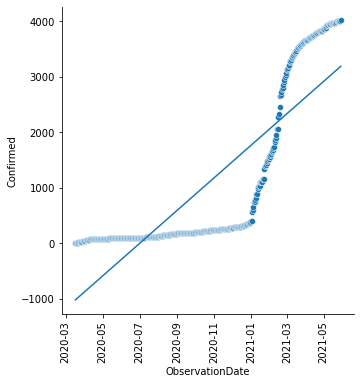

1.1120530311435376e-13
Montenegro


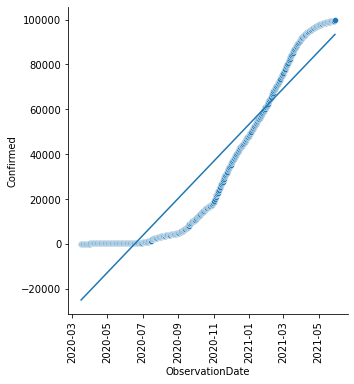

3.128225266375363e-12
The Gambia


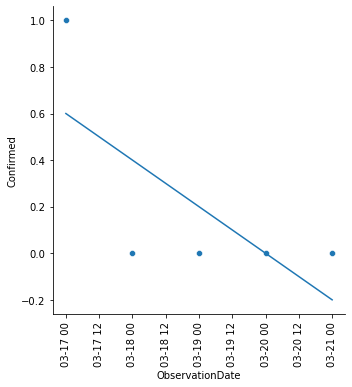

-2.3148148148137907e-15
Kyrgyzstan


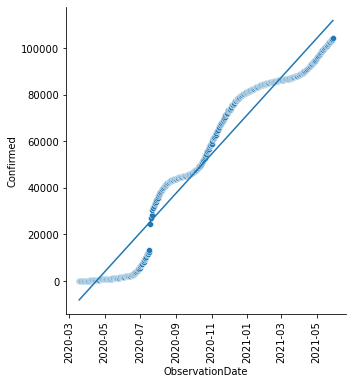

3.1764234732779815e-12
Mauritius


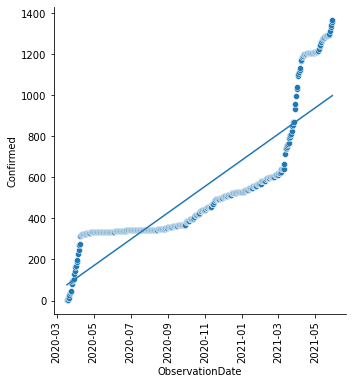

2.4383355315227607e-14
Zambia


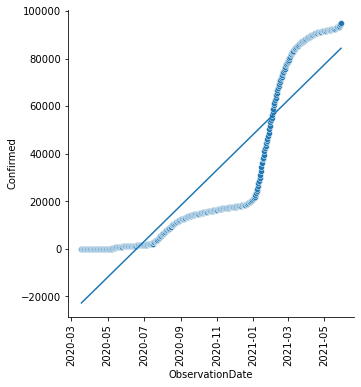

2.835473923880169e-12
Djibouti


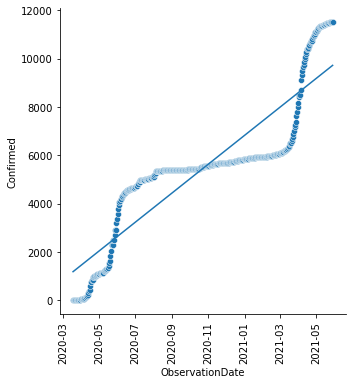

2.2641062056671306e-13
Gambia, The


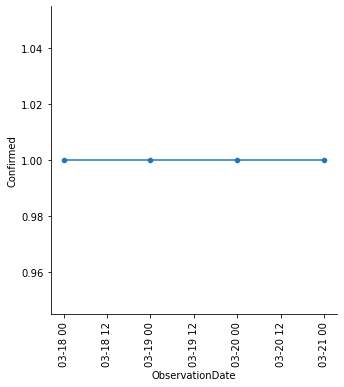

-7.006244923463664e-35
Bahamas, The


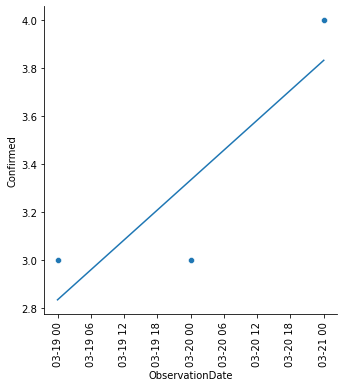

5.787037037058592e-15
Chad


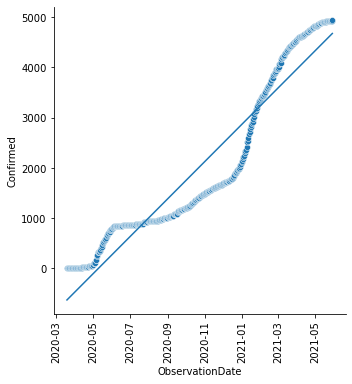

1.4057826262384515e-13
El Salvador


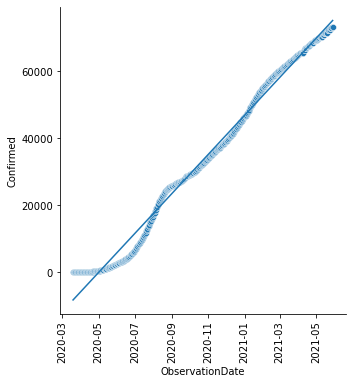

2.2145792390135543e-12
Fiji


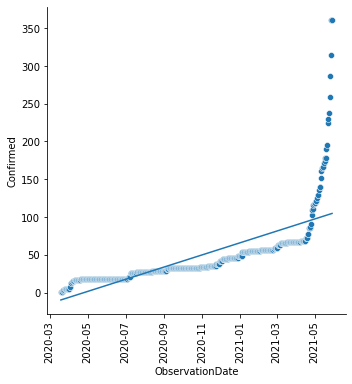

3.03892385520387e-15
Nicaragua


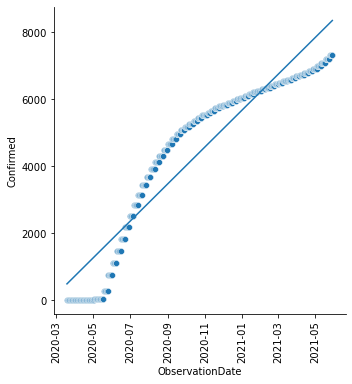

2.0888318197844068e-13
Madagascar


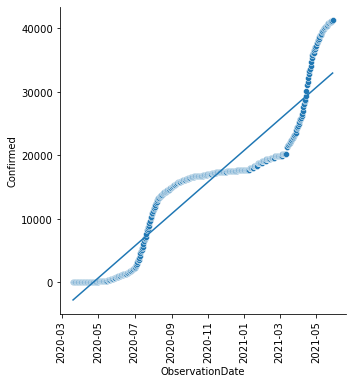

9.50797319163261e-13
Haiti


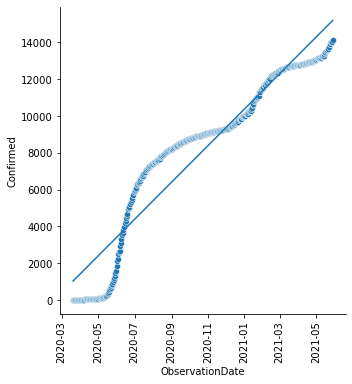

3.7651749598670225e-13
Angola


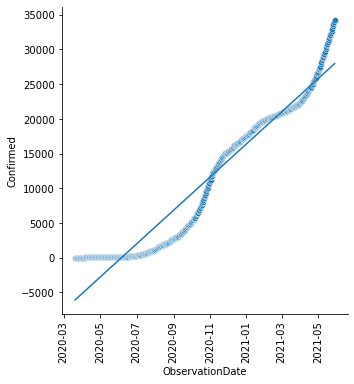

9.06446673217657e-13
Cabo Verde


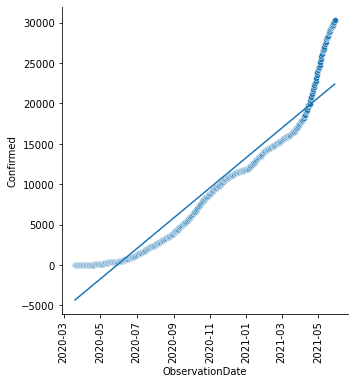

7.108679023664823e-13
Niger


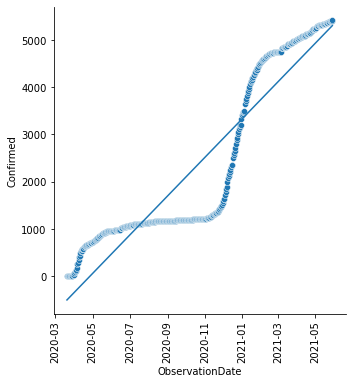

1.5434203652371964e-13
Papua New Guinea


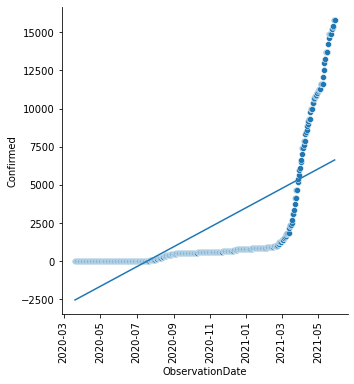

2.4427381462576235e-13
Zimbabwe


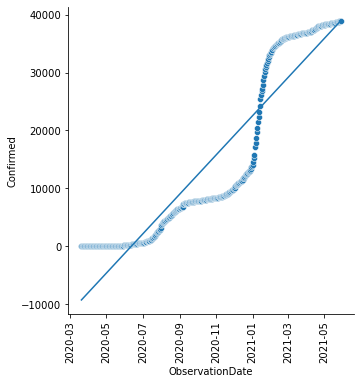

1.282481213488161e-12
Cape Verde


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


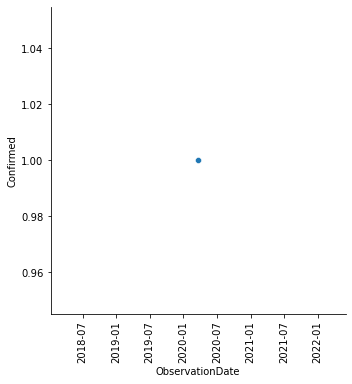

3.155074166959456e-19
East Timor


C:\Users\GAMING STORE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


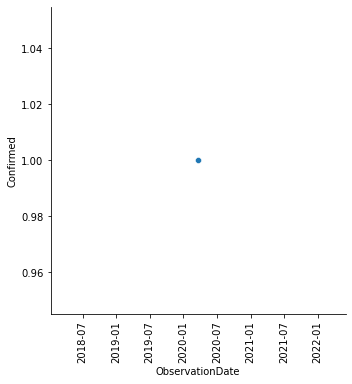

3.155074166959456e-19
Eritrea


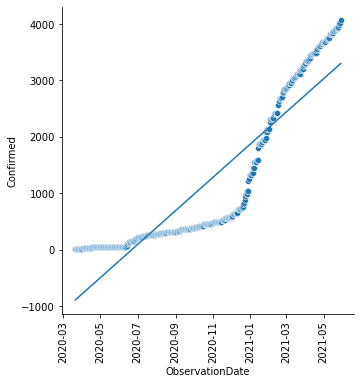

1.1182124239732854e-13
Uganda


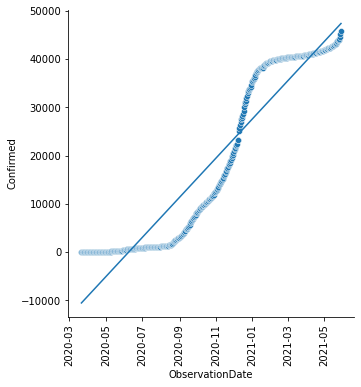

1.5456211654574267e-12
Bahamas


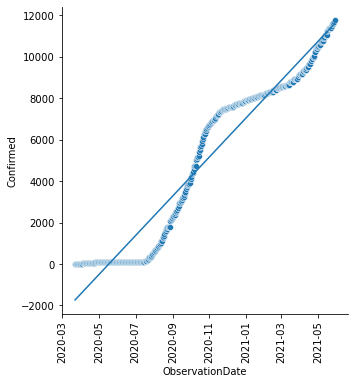

3.5618582421692444e-13
Dominica


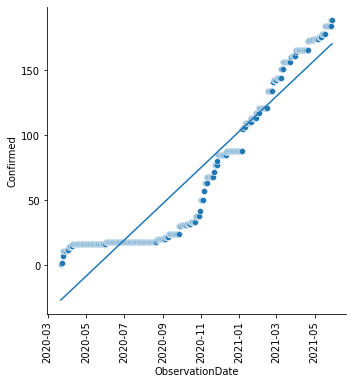

5.262039406501938e-15
Gambia


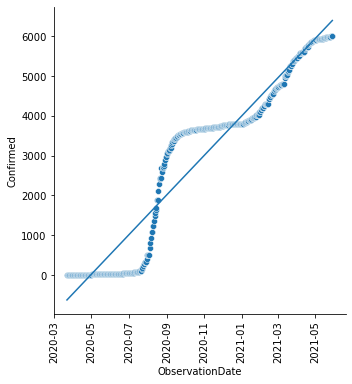

1.8749418082796556e-13
Grenada


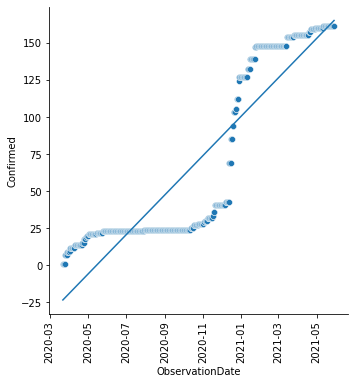

5.0311575970699315e-15
Mozambique


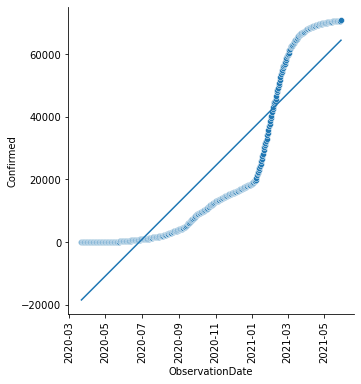

2.2155174690491023e-12
Samoa


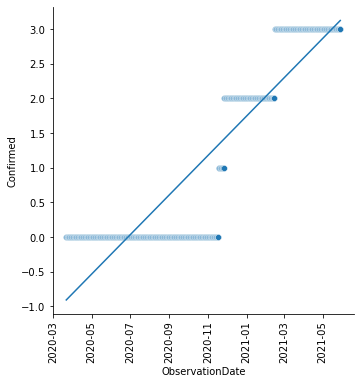

1.0774643016137905e-16
Syria


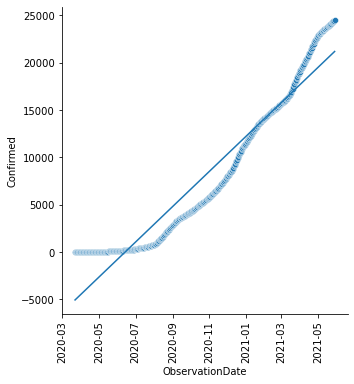

7.01210473074321e-13
Timor-Leste


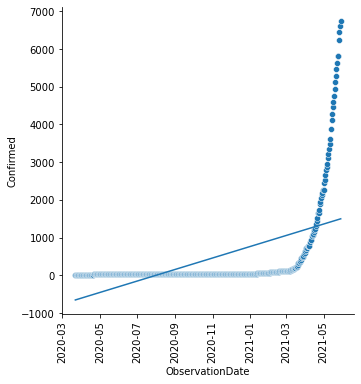

5.750936168008496e-14
Belize


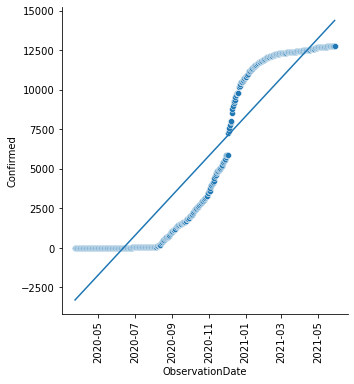

4.733249981287665e-13
Laos


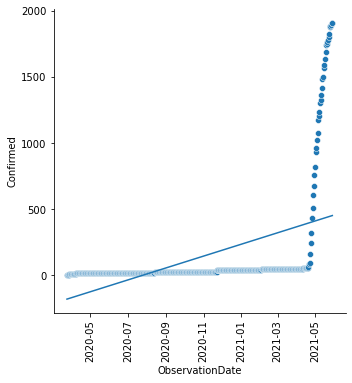

1.6956515493240586e-14
Libya


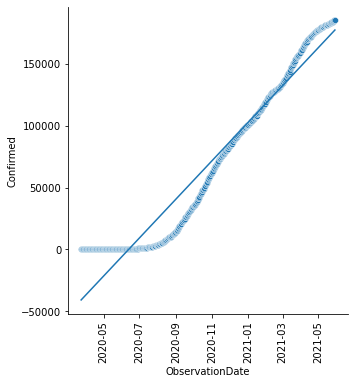

5.851105103229686e-12
Diamond Princess


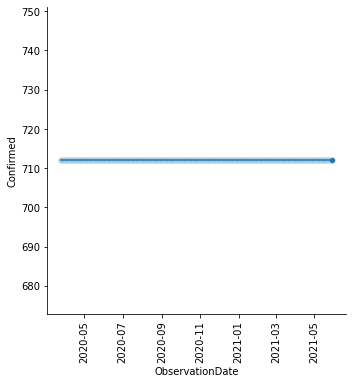

-2.4585507507354257e-31
Guinea-Bissau


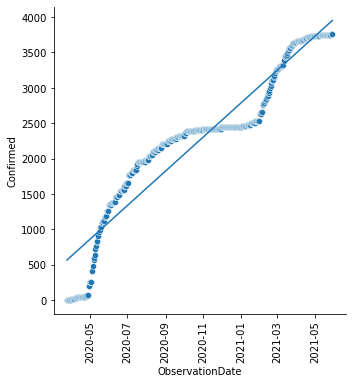

9.113434925832413e-14
Mali


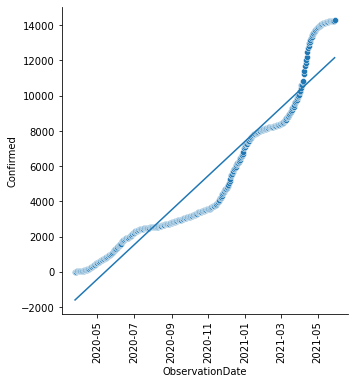

3.70193375100114e-13
Saint Kitts and Nevis


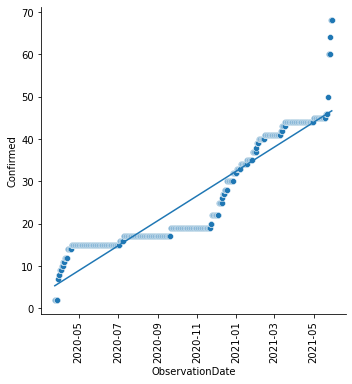

1.1119464301138688e-15
West Bank and Gaza


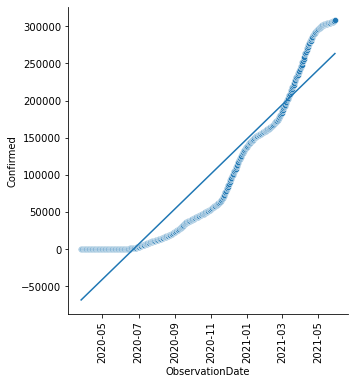

8.959862899450413e-12
Burma


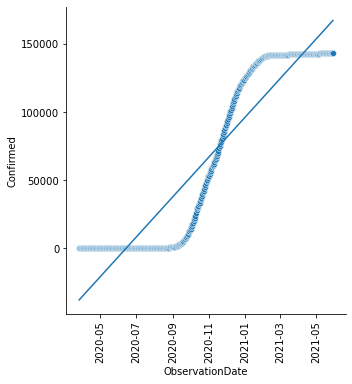

5.543265112645387e-12
MS Zaandam


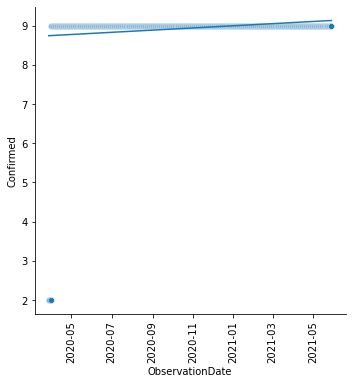

1.0515561304592144e-17
Botswana


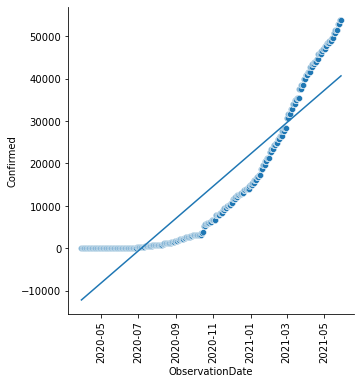

1.4412650570374694e-12
Burundi


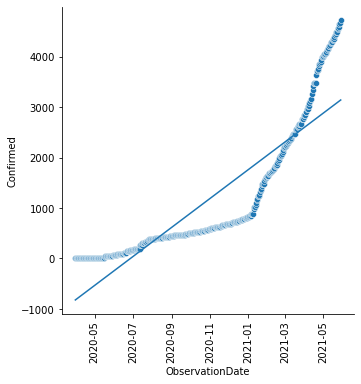

1.0814745085591451e-13
Sierra Leone


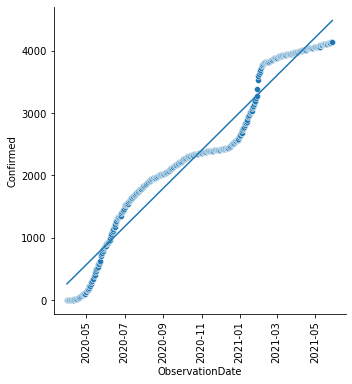

1.153656033086752e-13
Malawi


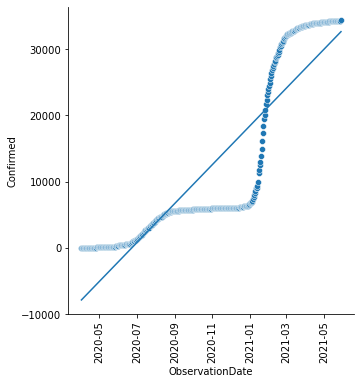

1.1116545017712984e-12
South Sudan


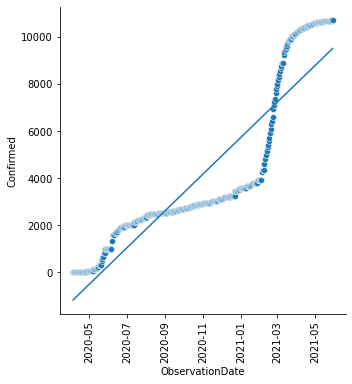

2.948550047119911e-13
Sao Tome and Principe


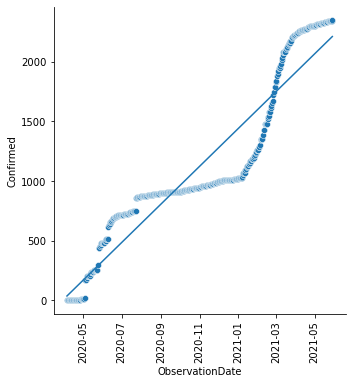

6.018037805030648e-14
Yemen


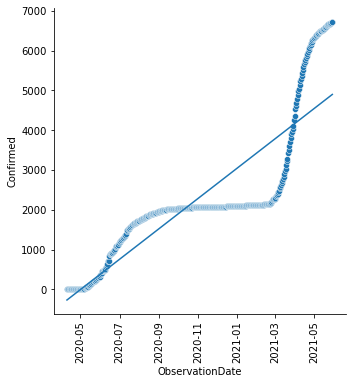

1.4437668688503513e-13
Comoros


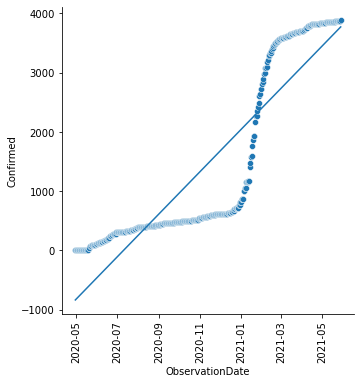

1.3543646689502843e-13
Tajikistan


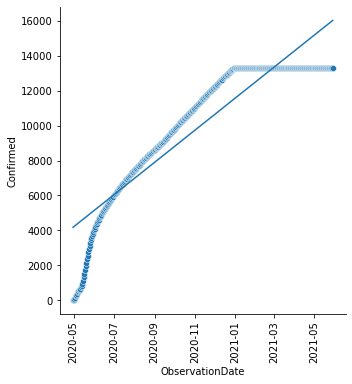

3.4781510902826974e-13
Lesotho


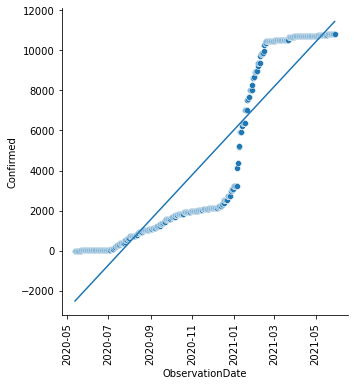

4.243048037615058e-13
Solomon Islands


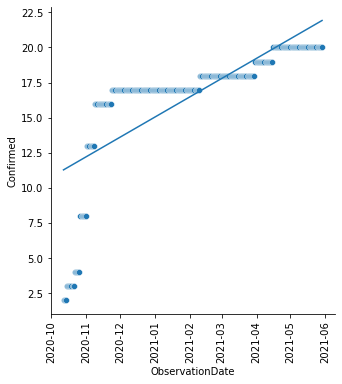

5.382830995134021e-16
Marshall Islands


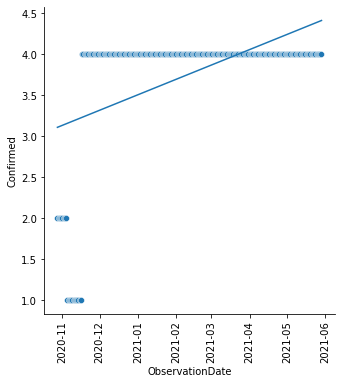

7.080404942474015e-17
Vanuatu


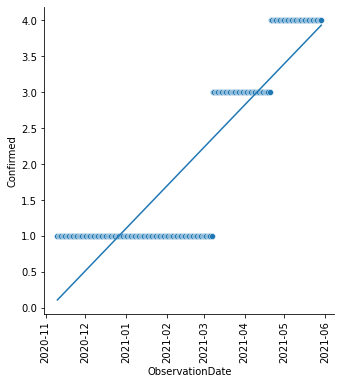

2.215442315375811e-16
Micronesia


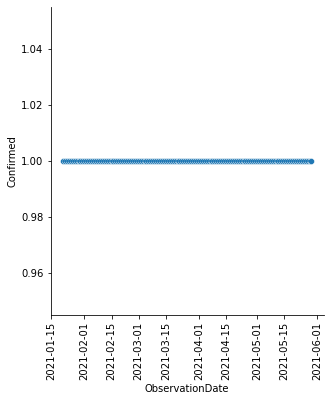

3.6760731320027866e-33
The country that has the best trend in the world is Turkey with a slope of  1.2901872050635527e-10


In [102]:
empty2 = []
for c in covidu:
    print(c)
    covid_country = covid[covid['Country/Region'] == c]
    sns.relplot(x = 'ObservationDate', y = 'Confirmed', hue = 'Province/State', data = covid_country, kind = 'scatter')
    plt.xticks(rotation=90)
    a, b = np.polyfit(covid_country['ObservationDate'].values.astype(float), covid_country['Confirmed'], 1)
    y = a * covid_country['ObservationDate'].values.astype(float) + b
    empty1 = {c: a}
    empty2.append(empty1)
    plt.plot(covid_country['ObservationDate'], y)
    plt.show()
    print(a)
max_key, max_value = max((name_age for dct in empty2 for name_age in dct.items()), key=lambda x: x[1])
print('The country that has the best trend in the world is',max_key, 'with a slope of ',max_value)

Turkey


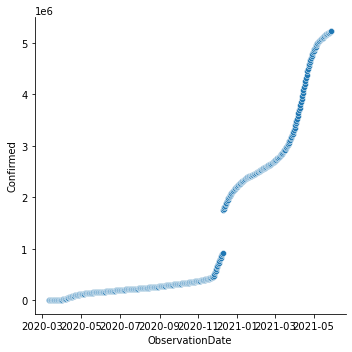

with a regression line of 1.2901872050635527e-10


In [105]:
covid_turkey = covid[covid['Country/Region'] == max_key]
print(max_key)
sns.relplot(x = 'ObservationDate', y = 'Confirmed', hue = 'Province/State', data = covid_turkey, kind = 'scatter')
plt.show()
print('with a regression line of', max_value)